In [26]:
import os

# Change the working directory
os.chdir("/Users/sbrya")

cwd = os.getcwd()
print(cwd)

c:\Users\sbrya


# Market Basket Analysis

## Intoduction to MBA

### Standard procedure for market basket analysis
1. Generate large set of rules
2. Filter rules using metrics
3. Apply intuition and common sense.


### If This, Then That
Market Basket Analysis delves into the rules of  *association* between the different items in a given customer's basket. For example, if a grocery store shopper buys bread, then they could be more likely to buy butter, or vice versa. The Market Basket Analysis allows us to determine the likelihood that the selection of one product, the **antecedent** $X$, leads to the selection of another item the **consequent** $Y$:

$X \rightarrow Y$

In [27]:
import pandas as pd

basket = {1:["milk", "egg", "bread", "butter"],
          2:["milk", "butter", "egg", "ketchup", "butter"],
          3:["bread", "butter", "ketchup"],
          4:["milk", "bread", "butter"],
          5:["bread", "butter", "cookies"],
          6:["milk", "bread", "butter", "cookies"],
          7:["milk", "cookies"],
          8:["milk", "bread", "butter"],
          9:["bread", "butter", "egg", "cookies"],
          10:["milk", "butter", "bread"],
          11:["milk", "bread"],
          12:["milk", "bread", "cookies", "ketchup"]}

[print(f"Transaction {i}:", basket[i]) for i in basket]

unique_items = set()
for items in basket.values():
  for item in items:
    unique_items.add(item)
print("\n\nUnique Items: ", list(unique_items))

Transaction 1: ['milk', 'egg', 'bread', 'butter']
Transaction 2: ['milk', 'butter', 'egg', 'ketchup', 'butter']
Transaction 3: ['bread', 'butter', 'ketchup']
Transaction 4: ['milk', 'bread', 'butter']
Transaction 5: ['bread', 'butter', 'cookies']
Transaction 6: ['milk', 'bread', 'butter', 'cookies']
Transaction 7: ['milk', 'cookies']
Transaction 8: ['milk', 'bread', 'butter']
Transaction 9: ['bread', 'butter', 'egg', 'cookies']
Transaction 10: ['milk', 'butter', 'bread']
Transaction 11: ['milk', 'bread']
Transaction 12: ['milk', 'bread', 'cookies', 'ketchup']


Unique Items:  ['milk', 'butter', 'cookies', 'bread', 'egg', 'ketchup']


## Metrics

### Frequency
**Frequency** refers to the coount of transactions which include a given item or itemset. The frequency of any item $X$ is portrayed as the following:

$Frequency(X)$

|    | item    |   frequency |
|---:|:--------|------------:|
|  0 | milk    |           9 |
|  1 | egg     |           3 |
|  2 | bread   |          10 |
|  3 | butter  |          10 |
|  4 | ketchup |           3 |
|  5 | cookies |           5 |

I find that the term "frequency" when used in market basket analysis is a little bit of a misnomer. To me, "frequency" gives the impression of a standard rate of occurence, which I find much more suitable for our next metric "support".

### Support
As I mentioned, the term "frequency" would probably be better suited for the metric that is defined by "support". **Support** is essentially the previous count metric, defined as a percentage of all transactions:

$Support(X) = \frac{Frequency(X)}{N}$

Or more simply, the support of any item $X$ is the number of transactions with that item ($Frequency(X)$) divided by the total number of transactions $N$.

|    | item    |   frequency |   support |
|---:|:--------|------------:|----------:|
|  0 | milk    |           9 |      0.75 |
|  1 | egg     |           3 |      0.25 |
|  2 | bread   |          10 |      0.83 |
|  3 | butter  |          10 |      0.83 |
|  4 | ketchup |           3 |      0.25 |
|  5 | cookies |           5 |      0.42 |

Support can be a tricky metric to benchmark, as store with different product lines will have different standards for what items qualify as having high support.

Let's say you are a balloon store, and carry three types of balloons: yellow, green, and blue. One day, you record 8 different transactions; you tally up end-of-day sales of 3 yellow balloons, 1 green balloon, and 4 blue balloons. You support for blue balloons is 50%. On another day, you begin carrying red balloons, attracting new prospective customers. Your daily sales are exactly the same as before, with the addition of 2 red balloons. Despite your total balloon sales being 1.25 times greater, your support for blue balloons has now dropped to 40%. This is because support is relative.

Essentially, the greater the number of different products sold, the lower the support any typical item would be expected to have. With a more diverse selection of products, expect to have lower support for each product.

Support can also be applied to combinations of itemsets within a single transaction. For itemsets containing only 2 items $X$ and $Y$, support can be written as:

$Support(X \& Y) = \frac{Frequency(X\&Y)}{N}$

Note that the support between two items of the same itemset remains the same, regardless of whether one is an antecedent or consequent.

| Itemset                |   Support |
|:-----------------------|----------:|
| ('bread', 'butter')    |      0.67 |
| ('bread', 'milk')      |      0.58 |
| ('butter', 'milk')     |      0.58 |
| ('butter', 'egg')      |      0.33 |
| ('bread', 'cookies')   |      0.33 |
| ('butter', 'ketchup')  |      0.25 |
| ('butter', 'cookies')  |      0.25 |
| ('cookies', 'milk')    |      0.25 |
| ('bread', 'egg')       |      0.17 |
| ('egg', 'milk')        |      0.17 |
| ('ketchup', 'milk')    |      0.17 |
| ('bread', 'ketchup')   |      0.17 |
| ('butter', 'butter')   |      0.08 |
| ('egg', 'ketchup')     |      0.08 |
| ('cookies', 'egg')     |      0.08 |
| ('cookies', 'ketchup') |      0.08 |

### Confidence
**Confidence** measures how often a consequent item is bought, given that an antecedent item is bought has been purchased. The probability that Item 𝑌 will be purchased, given the purchase of Item 𝑋.

$Confidence(X \rightarrow Y) = \frac{Support(X \& Y)}{Support(X)}$

Confidence is a strong rule to follow, but it is also heavily favorable towards consequent items with high support values. To put it another way, confidence is typically higher for rules where the predicted item(s) is common, regardless of whether or not a strong association exists. This is when other metrics become helpful.

Here is what the Confidence looks like for various rules in our earlier set of transactions:

| Antecedents   | Consequents   |   Confidence |
|:--------------|:--------------|----------:|
| Egg           | Butter        |  1        |
| Butter        | Bread         |  0.888889 |
| Bread         | Butter        |  0.8      |
| Cookies       | Bread         |  0.8      |
| Milk          | Bread         |  0.777778 |
| Bread         | Milk          |  0.7      |
| Ketchup       | Butter        |  0.666667 |
| Ketchup       | Bread         |  0.666667 |
| Egg           | Bread         |  0.666667 |
| Egg           | Milk          |  0.666667 |
| Ketchup       | Milk          |  0.666667 |
| Milk          | Butter        |  0.666667 |
| Butter        | Milk          |  0.666667 |
| Cookies       | Butter        |  0.6      |
| Cookies       | Milk          |  0.6      |
| Bread         | Cookies       |  0.4      |
| Ketchup       | Egg           |  0.333333 |
| Butter        | Egg           |  0.333333 |
| Ketchup       | Cookies       |  0.333333 |
| Egg           | Cookies       |  0.333333 |
| Milk          | Cookies       |  0.333333 |
| Butter        | Cookies       |  0.333333 |
| Egg           | Ketchup       |  0.333333 |
| Butter        | Ketchup       |  0.222222 |
| Milk          | Egg           |  0.222222 |
| Milk          | Ketchup       |  0.222222 |
| Cookies       | Egg           |  0.2      |
| Cookies       | Ketchup       |  0.2      |
| Bread         | Ketchup       |  0.2      |
| Bread         | Egg           |  0.2      |

| Antecedents   | Consequents   |   Confidence |   | Antecedents   | Consequents   |   Confidence |
|:--------------|:--------------|----------:|---|:--------------|:--------------|----------:|
| Egg           | Butter        |  1        |   | Bread         | Cookies       |  0.4      |
| Butter        | Bread         |  0.888889 |   | Egg           | Ketchup       |  0.333333 |
| Bread         | Butter        |  0.8      |   | Butter        | Cookies       |  0.333333 |
| Cookies       | Bread         |  0.8      |   | Ketchup       | Egg           |  0.333333 |
| Milk          | Bread         |  0.777778 |   | Butter        | Egg           |  0.333333 |
| Bread         | Milk          |  0.7      |   | Ketchup       | Cookies       |  0.333333 |
| Ketchup       | Butter        |  0.666667 |   | Egg           | Cookies       |  0.333333 |
| Ketchup       | Bread         |  0.666667 |   | Milk          | Cookies       |  0.333333 |
| Egg           | Bread         |  0.666667 |   | Milk          | Ketchup       |  0.222222 |
| Egg           | Milk          |  0.666667 |   | Milk          | Egg           |  0.222222 |
| Ketchup       | Milk          |  0.666667 |   | Butter        | Ketchup       |  0.222222 |
| Milk          | Butter        |  0.666667 |   | Bread         | Ketchup       |  0.2      |
| Butter        | Milk          |  0.666667 |   | Bread         | Egg           |  0.2      |
| Cookies       | Butter        |  0.6      |   | Cookies       | Egg           |  0.2      |
| Cookies       | Milk          |  0.6      |   | Cookies       | Ketchup       |  0.2      |

In [90]:
def convert_markdown_to_wide(markdown_table):
    # Split the markdown table into lines
    lines = markdown_table.strip().split("\n")
    
    # Remove the header and separator lines
    headers = lines[0].strip()
    separator = lines[1].strip()
    data_lines = lines[2:]
    
    # Determine the midpoint of the data
    midpoint = len(data_lines) // 2
    
    # Split the data into two halves
    first_half = data_lines[:midpoint]
    second_half = data_lines[midpoint:]
    
    # Initialize the new markdown format
    new_table = []
    
    # Add the first header
    new_table.append("| Antecedents   | Consequents   |   Support |   | Antecedents   | Consequents   |   Support |")
    new_table.append("|:--------------|:--------------|----------:|---|:--------------|:--------------|----------:|")
    
    # Process the first half
    for line in first_half:
        new_table.append(f"| {line.strip()} |   |   |")
    
    # Add empty lines for the second half
    for i in range(len(first_half), len(data_lines)):
        new_table.append(f"|   |   |   | {data_lines[i].strip()} |")
    
    # Join the lines back into a markdown table string
    return "\n".join(new_table)


# Example markdown input (from your data)
markdown_input = """
| Antecedents   | Consequents   |   Support |
|:--------------|:--------------|----------:|
| Egg           | Butter        |  1        |
| Butter        | Bread         |  0.888889 |
| Bread         | Butter        |  0.8      |
| Cookies       | Bread         |  0.8      |
| Milk          | Bread         |  0.777778 |
| Bread         | Milk          |  0.7      |
| Ketchup       | Butter        |  0.666667 |
| Ketchup       | Bread         |  0.666667 |
| Egg           | Bread         |  0.666667 |
| Egg           | Milk          |  0.666667 |
| Ketchup       | Milk          |  0.666667 |
| Milk          | Butter        |  0.666667 |
| Butter        | Milk          |  0.666667 |
| Cookies       | Butter        |  0.6      |
| Cookies       | Milk          |  0.6      |
| Bread         | Cookies       |  0.4      |
| Ketchup       | Egg           |  0.333333 |
| Butter        | Egg           |  0.333333 |
| Ketchup       | Cookies       |  0.333333 |
| Egg           | Cookies       |  0.333333 |
| Milk          | Cookies       |  0.333333 |
| Butter        | Cookies       |  0.333333 |
| Egg           | Ketchup       |  0.333333 |
| Butter        | Ketchup       |  0.222222 |
| Milk          | Egg           |  0.222222 |
| Milk          | Ketchup       |  0.222222 |
| Cookies       | Egg           |  0.2      |
| Cookies       | Ketchup       |  0.2      |
| Bread         | Ketchup       |  0.2      |
| Bread         | Egg           |  0.2      |
"""

# Call the function to convert the markdown to wide format
wide_markdown_output = convert_markdown_to_wide(markdown_input)

# Print the result
print(wide_markdown_output)


| Antecedents   | Consequents   |   Support |   | Antecedents   | Consequents   |   Support |
|:--------------|:--------------|----------:|---|:--------------|:--------------|----------:|
| | Egg           | Butter        |  1        | |   |   |
| | Butter        | Bread         |  0.888889 | |   |   |
| | Bread         | Butter        |  0.8      | |   |   |
| | Cookies       | Bread         |  0.8      | |   |   |
| | Milk          | Bread         |  0.777778 | |   |   |
| | Bread         | Milk          |  0.7      | |   |   |
| | Ketchup       | Butter        |  0.666667 | |   |   |
| | Ketchup       | Bread         |  0.666667 | |   |   |
| | Egg           | Bread         |  0.666667 | |   |   |
| | Egg           | Milk          |  0.666667 | |   |   |
| | Ketchup       | Milk          |  0.666667 | |   |   |
| | Milk          | Butter        |  0.666667 | |   |   |
| | Butter        | Milk          |  0.666667 | |   |   |
| | Cookies       | Butter        |  0.6      | |   |   |


You'll notice that this table is much longer than the prior support table. That is because. Confidence is a directional metric, meaning that order matters. In terms of probability, confidence operates off of *permutations* of antecedent-consequent pairings instead of *combinations*, meaning that the number of different antecedent-consequent selections to try will often be exponentially higher than the amount of itemset combinations calculated in an itemset support scenario (like in the previous table). In a scenario of 6 items and only itemsets of length two the number of combinations in 15, and the number of permutations is 30. For itemsets of length 3, the number of antecedent-consequent pairings can be *over* 20 combinations and 120 permutions (* "over", because we're effectively performing combination formulas on top of other combination/permutation formulas; "{bread, milk} -> {butter}" is a different rule from "{bread} -> {milk, butter}").

As baskets incorporate more and more products, the ways to build various antecedent-consequent rule combinations will skyrocket to a point that is nonviable. We'll discuss how to deal with this later on.

### Lift
**Lift** measures the strength of the association between 𝑋 and 𝑌 compared to when the two items or itemsets are independent. It is calculated as the ratio of the observed support for a pair of items to the expected support if the items were independent. In simpler terms, it tells us how much more or less likely two associated items are to be bought together than by chance.

$Lift(X \& Y) = \frac{Support(X \& Y)}{Support(X) \times Support(Y)}$

\*OR\*

$Lift(X \& Y) = \frac{Observed~Support}{Expected~Support}$

The support values in this formula can also be thought of in terms of probability: P(𝑋), P(𝑌), and  P(𝑋∩𝑌). The value of lift relative to 1 indicates measures the degree of association or disassociation, similar to the Pearson r-coefficient for correlation.
- **Lift > 1**: The items are positively associated, meaning the occurrence of one item increases the likelihood of the other item being purchased.
- **Lift = 1**: The items are independent, meaning there's no association between them.
- **Lift < 1**: The items are negatively associated, meaning the occurrence of one item decreases the likelihood of the other item being purchased.

Lift is not a directional metric, so it does not matter which items in a set repesent the antecedent(s) or consequent(s). The lift values of the rules "𝑋 -> 𝑌" and "𝑌 -> 𝑋" are equivalent.

| Antecedents           | Consequents           |   Lift   |
|:----------------------|:----------------------|:---------|
| Egg                   | Ketchup               |  1.33333 |
| Egg                   | Butter                |  1.33333 |
| Butter                | Egg                   |  1.33333 |
| Ketchup               | Egg                   |  1.33333 |
| Butter                | Bread                 |  1.06667 |
| Bread                 | Butter                |  1.06667 |
| Bread                 | Cookies               |  0.96    |
| Cookies               | Bread                 |  0.96    |
| Bread                 | Milk                  |  0.93333 |
| Milk                  | Bread                 |  0.93333 |
| Ketchup               | Butter                |  0.88889 |
| Butter                | Ketchup               |  0.88889 |
| Milk                  | Egg                   |  0.88889 |
| Egg                   | Milk                  |  0.88889 |
| Milk                  | Ketchup               |  0.88889 |
| Ketchup               | Milk                  |  0.88889 |
| Milk                  | Butter                |  0.88889 |
| Butter                | Milk                  |  0.88889 |
| Bread                 | Egg                   |  0.8     |
| Ketchup               | Bread                 |  0.8     |
| Bread                 | Ketchup               |  0.8     |
| Egg                   | Bread                 |  0.8     |
| Cookies               | Milk                  |  0.8     |
| Egg                   | Cookies               |  0.8     |
| Cookies               | Egg                   |  0.8     |
| Milk                  | Cookies               |  0.8     |
| Cookies               | Ketchup               |  0.8     |
| Butter                | Cookies               |  0.8     |
| Cookies               | Butter                |  0.8     |
| Ketchup               | Cookies               |  0.8     |

| Antecedents           | Consequents           |   Lift   |   | Antecedents           | Consequents           |   Lift   |
|:----------------------|:----------------------|:---------|---|:----------------------|:----------------------|:---------|
| Egg                   | Ketchup               |  1.33333 |   | Milk                  | Ketchup               |  0.88889 |
| Egg                   | Butter                |  1.33333 |   | Butter                | Milk                  |  0.88889 |
| Butter                | Egg                   |  1.33333 |   | Milk                  | Butter                |  0.88889 |
| Ketchup               | Egg                   |  1.33333 |   | Ketchup               | Cookies               |  0.8     |
| Butter                | Bread                 |  1.06667 |   | Bread                 | Egg                   |  0.8     |
| Bread                 | Butter                |  1.06667 |   | Ketchup               | Bread                 |  0.8     |
| Bread                 | Cookies               |  0.96    |   | Bread                 | Ketchup               |  0.8     |
| Cookies               | Bread                 |  0.96    |   | Egg                   | Bread                 |  0.8     |
| Bread                 | Milk                  |  0.93333 |   | Cookies               | Milk                  |  0.8     |
| Milk                  | Bread                 |  0.93333 |   | Egg                   | Cookies               |  0.8     |
| Ketchup               | Butter                |  0.88889 |   | Cookies               | Egg                   |  0.8     |
| Butter                | Ketchup               |  0.88889 |   | Milk                  | Cookies               |  0.8     |
| Milk                  | Egg                   |  0.88889 |   | Cookies               | Ketchup               |  0.8     |
| Egg                   | Milk                  |  0.88889 |   | Butter                | Cookies               |  0.8     |
| Ketchup               | Milk                  |  0.88889 |   | Cookies               | Butter                |  0.8     |


### Leverage
**Leverage** is similar to lift but focuses on the *difference* between the observed and expected support, instead of the ratio between them.

$Leverage(X \& Y) = {Support(X \& Y)} - {Support(X) \times Support(Y)}$

\*OR\*

$Leverage(X \& Y) = {Observed~Support}-{Expected~Support}$

- **Leverage > 0** (*Positive*): The items appear together more frequently than expected by chance, indicating a positive association.
- **Leverage = 0** (*Neutral*): The items are independent, meaning there is no difference between the observed and expected co-occurrence of the items.
- **Leverage < 0** (*Negative*): The items appear together less frequently than expected, indicating a negative association.

Like lift, leverage is a directional metric. Leverage is somewhat more influenced by the support of the itemset than lift, but this relationship is not as strong as the one between confidence and consequent support.

| Antecedents           | Consequents           |   Leverage  |
|:----------------------|:----------------------|------------:|
| Butter                | Egg                   |  0.0625     |
| Egg                   | Butter                |  0.0625     |
| Butter                | Bread                 |  0.0416667  |
| Bread                 | Butter                |  0.0416667  |
| Egg                   | Ketchup               |  0.0208333  |
| Ketchup               | Egg                   |  0.0208333  |
| Bread                 | Cookies               | -0.0138889  |
| Cookies               | Bread                 | -0.0138889  |
| Butter                | Ketchup               | -0.0208333  |
| Ketchup               | Butter                | -0.0208333  |
| Egg                   | Cookies               | -0.0208333  |
| Cookies               | Egg                   | -0.0208333  |
| Cookies               | Ketchup               | -0.0208333  |
| Ketchup               | Cookies               | -0.0208333  |
| Milk                  | Egg                   | -0.0208333  |
| Egg                   | Milk                  | -0.0208333  |
| Milk                  | Ketchup               | -0.0208333  |
| Ketchup               | Milk                  | -0.0208333  |
| Milk                  | Bread                 | -0.0416667  |
| Bread                 | Milk                  | -0.0416667  |
| Bread                 | Ketchup               | -0.0416667  |
| Ketchup               | Bread                 | -0.0416667  |
| Bread                 | Egg                   | -0.0416667  |
| Egg                   | Bread                 | -0.0416667  |
| Butter                | Cookies               | -0.0625     |
| Milk                  | Cookies               | -0.0625     |
| Cookies               | Butter                | -0.0625     |
| Milk                  | Butter                | -0.0625     |
| Butter                | Milk                  | -0.0625     |
| Cookies               | Milk                  | -0.0625     |

-

| Antecedents           | Consequents           |   Leverage  |   | Antecedents           | Consequents           |   Leverage  |
|:----------------------|:----------------------|------------:|---|:----------------------|:----------------------|------------:|
| Butter                | Egg                   |  0.0625     |   | Egg                   | Milk                  | -0.0208333  |
| Egg                   | Butter                |  0.0625     |   | Milk                  | Ketchup               | -0.0208333  |
| Butter                | Bread                 |  0.0416667  |   | Ketchup               | Milk                  | -0.0208333  |
| Bread                 | Butter                |  0.0416667  |   | Milk                  | Bread                 | -0.0416667  |
| Egg                   | Ketchup               |  0.0208333  |   | Bread                 | Milk                  | -0.0416667  |
| Ketchup               | Egg                   |  0.0208333  |   | Bread                 | Ketchup               | -0.0416667  |
| Bread                 | Cookies               | -0.0138889  |   | Ketchup               | Bread                 | -0.0416667  |
| Cookies               | Bread                 | -0.0138889  |   | Bread                 | Egg                   | -0.0416667  |
| Butter                | Ketchup               | -0.0208333  |   | Egg                   | Bread                 | -0.0416667  |
| Ketchup               | Butter                | -0.0208333  |   | Butter                | Cookies               | -0.0625     |
| Egg                   | Cookies               | -0.0208333  |   | Milk                  | Cookies               | -0.0625     |
| Cookies               | Egg                   | -0.0208333  |   | Cookies               | Butter                | -0.0625     |
| Cookies               | Ketchup               | -0.0208333  |   | Milk                  | Butter                | -0.0625     |
| Ketchup               | Cookies               | -0.0208333  |   | Butter                | Milk                  | -0.0625     |
| Milk                  | Egg                   | -0.0208333  |   | Cookies               | Milk                  | -0.0625     |


### Conviction

**Conviction** compares the expected and actual frequency of X occurring without Y. It shows how likely X happening means Y won’t happen. A high conviction value means X and Y are closely linked, and that event A rarely happens without event B. The formula for conviction is sort of like an inverted version of the lift formula:

$Conviction(X \rightarrow Y) = \frac{Support(X) \times Support(\bar{Y})}{Support(X \& \bar{Y})}$

Where the $\bar{Y}$ in $Support(\bar{Y})$ and ${Support(X \& \bar{Y})}$ refers to an occurance of item 𝑌 not appearing in a transaction.

- Conviction = 1: The rule is not informative—there is no improvement in predicting the consequent given the antecedent.
- Conviction > 1: The rule is stronger, meaning the consequent is more likely to appear when the antecedent occurs. The higher the conviction, the stronger the rule.
- Conviction < 1: The rule is less reliable, meaning the antecedent has little influence on the occurrence of the consequent.

| Antecedents           | Consequents           |   Conviction |
|:----------------------|:----------------------|-------------:|
| Egg                   | Butter                |   inf        |
| Butter                | Bread                 |     1.5      |
| Bread                 | Butter                |     1.25     |
| Egg                   | Ketchup               |     1.125    |
| Ketchup               | Egg                   |     1.125    |
| Butter                | Egg                   |     1.125    |
| Bread                 | Cookies               |     0.972222 |
| Milk                  | Ketchup               |     0.964286 |
| Butter                | Ketchup               |     0.964286 |
| Milk                  | Egg                   |     0.964286 |
| Cookies               | Egg                   |     0.9375   |
| Bread                 | Egg                   |     0.9375   |
| Bread                 | Ketchup               |     0.9375   |
| Cookies               | Ketchup               |     0.9375   |
| Egg                   | Cookies               |     0.875    |
| Ketchup               | Cookies               |     0.875    |
| Milk                  | Cookies               |     0.875    |
| Butter                | Cookies               |     0.875    |
| Bread                 | Milk                  |     0.833333 |
| Cookies               | Bread                 |     0.833333 |
| Ketchup               | Butter                |     0.75     |
| Egg                   | Milk                  |     0.75     |
| Ketchup               | Milk                  |     0.75     |
| Milk                  | Bread                 |     0.75     |
| Milk                  | Butter                |     0.75     |
| Butter                | Milk                  |     0.75     |
| Cookies               | Butter                |     0.625    |
| Cookies               | Milk                  |     0.625    |
| Ketchup               | Bread                 |     0.5      |
| Egg                   | Bread                 |     0.5      |


### Zhang's Metric
**Zhang's Metric** measures the association or disassociation between two items in transaction data. The metric is set on a scale from -1 to 1. Positive values mean the items are more likely to be associated, negative values mean they’re more likely to be disassociated (purchasing one indicates the other *won't* be purchased), and values close to zero suggest no significant connection.

$Zhang(X \rightarrow Y) = \frac{{Confidence(X \rightarrow Y)}  -  {Confidence(\bar{X} \rightarrow Y)}}{Max[{Confidence(X \rightarrow Y)}  ,  {Confidence(\bar{X} \rightarrow Y)}]}$

| Antecedents           | Consequents           |   Zhangs Metric |
|:----------------------|:----------------------|----------------:|
| Butter                | Egg                   |       1         |
| Bread                 | Butter                |       0.375     |
| Egg                   | Butter                |       0.333333  |
| Egg                   | Ketchup               |       0.333333  |
| Ketchup               | Egg                   |       0.333333  |
| Butter                | Bread                 |       0.25      |
| Cookies               | Bread                 |      -0.0666667 |
| Ketchup               | Milk                  |      -0.142857  |
| Egg                   | Milk                  |      -0.142857  |
| Ketchup               | Butter                |      -0.142857  |
| Bread                 | Cookies               |      -0.2       |
| Milk                  | Bread                 |      -0.222222  |
| Egg                   | Cookies               |      -0.25      |
| Egg                   | Bread                 |      -0.25      |
| Ketchup               | Bread                 |      -0.25      |
| Ketchup               | Cookies               |      -0.25      |
| Bread                 | Milk                  |      -0.3       |
| Cookies               | Butter                |      -0.3       |
| Cookies               | Milk                  |      -0.3       |
| Cookies               | Egg                   |      -0.3       |
| Cookies               | Ketchup               |      -0.3       |
| Milk                  | Butter                |      -0.333333  |
| Butter                | Milk                  |      -0.333333  |
| Butter                | Ketchup               |      -0.333333  |
| Milk                  | Egg                   |      -0.333333  |
| Milk                  | Ketchup               |      -0.333333  |
| Milk                  | Cookies               |      -0.5       |
| Butter                | Cookies               |      -0.5       |
| Bread                 | Ketchup               |      -0.6       |
| Bread                 | Egg                   |      -0.6       |



## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Bakery Sales Data

This dataset covers transactions from a Korean bakery, and [comes from Kaggle](https://www.kaggle.com/datasets/hosubjeong/bakery-sales/data). From the user:

> ### About Dataset
>
>
> #### Context
>
> I worked part-time at a small bakery in Korea.
>
> Our bakery started the delivery service in July 2019.
>
> Our store delivers to customers through a platform called Bea Min.
>
> I collected this data and analyzed it to share it with my coworkers.
>
>
> #### Content
>
> It's a basket data.
>
> There are 27 columns.
> - datetime : order time
> - day of week: day of the week. our bakery usually closes Tues day.
> - total: Total Amount.
> - place: customer's place
> - angbutter: It's a pain's name. Pretzel filled with red beans and gourmet butter. you can check this link. https://www.10000recipe.com/recipe/6927002
> - plain bread: plain bread.
> - jam: peach jam.
> - americano: americano
> - croissant: croissnat.
> - caffe latte: caffe laffe.
> - tiramisu croissant: Croissants filled with tiramisu cream and fruit.
> - cacao deep: Croissant covered in Valrhona chocolate
> - pain au chocolate: Pain au chocolate.
> - almond croissant: Croissant filled with almond cream.
> - croque monsieur:
> - mad garlic:
> - milk tea: Mariage Frères milk tea.
> - gateau chocolat: piece of chocolate cake.
> - pandoro: pandoro: Italian pain.
> - cheese cake: Cheese cake.
> - lemon ade: Lemon ade
> - orange pound: Orange pound cake.
> - wiener: sausage bread.
> - vanila latte: Brewed with Madagascar vanilla bean.
> - berry ade: berry ade.
> - tiramisu: tiramisu cake.
> - merinque cookies: cookies."

I've uploaded [a copy of the CSV data on my GitHub page](https://github.com/bryantjay/Portfolio/blob/main/Korean%20Bakery%20Market%20Basket%20Analysis/source_files/Bakery%20Sales.csv), and will source my data workflow from there.

### Read-in

First step is to read in the data and make sure it's present.

In [28]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Create URL path assignment to CSV data
path = "https://raw.githubusercontent.com/bryantjay/Portfolio/refs/heads/main/Korean%20Bakery%20Market%20Basket%20Analysis/source_files/Bakery%20Sales.csv"

# Load the dataset
bakery_data = pd.read_csv(path)

# Check the first few rows of the dataset
print(bakery_data.head().to_markdown())

|    | datetime         | day of week   |   total |   place |   angbutter |   plain bread |   jam |   americano |   croissant |   caffe latte |   tiramisu croissant |   cacao deep |   pain au chocolat |   almond croissant |   croque monsieur |   mad garlic |   milk tea |   gateau chocolat |   pandoro |   cheese cake |   lemon ade |   orange pound |   wiener |   vanila latte |   berry ade |   tiramisu |   merinque cookies |
|---:|:-----------------|:--------------|--------:|--------:|------------:|--------------:|------:|------------:|------------:|--------------:|---------------------:|-------------:|-------------------:|-------------------:|------------------:|-------------:|-----------:|------------------:|----------:|--------------:|------------:|---------------:|---------:|---------------:|------------:|-----------:|-------------------:|
|  0 | 2019-07-11 15:35 | Thur          |   23800 |     nan |           1 |           nan |   nan |           1 |         nan |           nan |   

Given the dataset owner's initial descrition, we already know that the dataset is in a wide format. Each row of the data represents a single transaction. It is not yet encoded, however. Instead each product column represents a quantity of an item sold. There are also additional fields detailing the time and place that a transaction occurred.

### Data Exploration

We'll take a look at the dataset and column attributes with calls to the `info()` and `describe()` methods.

In [29]:
print(bakery_data.info())
print(bakery_data.describe(include='all').to_markdown())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

The outputs inform us about the number of transactions each bakery item is included in, which is helpful. The 'Non-Null Count' column of the `info()` call effectively already summarizes the number of transactions each product appears in. If a transation includes a sale of a product, the quantity sold for that product is recorded as an integer; otherwise, it will be a null value. We can see top-performing products include the "plain bread", the croissant, and the angbutter bread (a Korean-signature pastry including butter and red beans on pretzel-like bun). The angbutter pastry account for the most sales of any single product. Additionally, we can also observe that items like the "croque monsieur", the "mad garlic", and the tiramisu are pretty weak sellers by relative comparison. In fact, the items "croque monsieur" and the "mad garlic" do not feature any sales at all in this dataset!

#### Simultaneous Transactions

We can see that the basket data has already been set to a wide format, where each bakery item has been encoded in a numeric fashion. Each row covers a separate transaction, and can include multiple items. There are instances of multiple transactions occuring at the same time and place, so let's check this out by sorting the datetime value counts.

In [30]:
print(bakery_data[['datetime', 'place']].value_counts().sort_values(ascending=False), "\n\n")
print(bakery_data[(bakery_data.datetime == "2019-10-03 14:50") & (bakery_data.place == "후평 2동")])

datetime          place
2019-10-03 14:50  후평 2동    2
2019-10-21 11:27  강남동      2
2020-04-02 13:12  석사동      2
2020-03-01 11:06  동면       2
2020-02-02 11:05  동면       2
                          ..
2020-05-01 15:03  동면       1
2020-05-01 15:19  동면       1
2020-05-02 11:37  동면       1
2020-05-02 11:39  후평 1동    1
2020-05-02 14:45  효자 1동    1
Name: count, Length: 2158, dtype: int64 


             datetime day of week    total  place  angbutter  plain bread  \
684  2019-10-03 14:50        Thur  21800.0  후평 2동        1.0          1.0   
685  2019-10-03 14:50        Thur  15400.0  후평 2동        2.0          NaN   

     jam  americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
684  NaN        NaN        1.0          NaN  ...              NaN      NaN   
685  NaN        NaN        NaN          NaN  ...              1.0      NaN   

     cheese cake  lemon ade  orange pound  wiener  vanila latte  berry ade  \
684          NaN        NaN           NaN     NaN           NaN      

It seems that the simultaneous transactions are valid data observations, as they represent non-duplicated orders. It's possible that some store locations probably have multiple POS systems, which could explain instances of different tranactions occuring at the same time and location.

#### Datetime Coersion

The 'datetime' field was initially parsed into the dataframe as a column of strings, so it should be coerced to a correct datatype for some bried exploratory analysis. We'll take a look at the earliest and latest dates, as well.

In [31]:
# Make sure the 'datetime' column is in the correct datetime format
bakery_data['datetime'] = pd.to_datetime(bakery_data['datetime'])

# Find the minimum and maximum datetime values
min_datetime = bakery_data['datetime'].min()
max_datetime = bakery_data['datetime'].max()

# Print the results
print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

Minimum datetime: 2019-07-11 15:35:00
Maximum datetime: 2020-06-18 14:52:00


#### Store Locations

There are 19 different store locations. Let's track how many transactions exist for each different location.

In [32]:
print(bakery_data.place.value_counts().sort_values(ascending=False))

print(print(bakery_data.place.unique()))

place
동면       416
후평 2동    254
후평 3동    249
후평 1동    196
석사동      169
퇴계동      146
효자 2동    143
소양동      132
신사우동      91
효자 3동     80
교동        65
강남동       52
효자 1동     50
조운동       37
동내면       31
근화동       29
약사명동      23
교동         2
신동면        1
Name: count, dtype: int64
[nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']
None


Most of the place names are written in Hangul(Korean) script, which is not something I'm familiar with. To make this a little easier, let's first transliterate the store location names to Roman script. I achieved the mapping by running the origial Hangul script through Google Translate, but I can't verify it for total correctness due to my lack of knowledge concerning the Korean language. We'll take Google's word for it.

In [33]:
# Translation dictionary
place_translation = {
    '효자 3동': 'Hyoja 3-dong',
    '후평 1동': 'Hupyeong 1-dong',
    '후평 2동': 'Hupyeong 2-dong',
    '석사동': 'Seoksadong',
    '소양동': 'Soyangdong',
    '퇴계동': 'Toegye-dong',
    '동면': 'Dongmyeon',
    '후평 3동': 'Hupyeong 3-dong',
    '신사우동': 'Sinsa-u-dong',
    '강남동': 'Gangnam-dong',
    '효자 1동': 'Hyoja 1-dong',
    '조운동': 'Jo-un-dong',
    '교동': 'Gyo-dong',
    '효자 2동': 'Hyoja 2-dong',
    '약사명동': 'Yaksamyeong-dong',
    '근화동': 'Geunhwa-dong',
    '동내면': 'Dongnae-myeon',
    '교동 ': 'Gyo-dong',
    '신동면': 'Sindong-myeon'
}

# Replace values in the 'place' column of your DataFrame
bakery_data['place'] = bakery_data['place'].map(place_translation).fillna(bakery_data['place'])


Now that we've transliterated our place names, let's view the above set of transaction counts per store in the form of a bar graph. I'll use the FiveThirtyEight-inspired Matplot style.

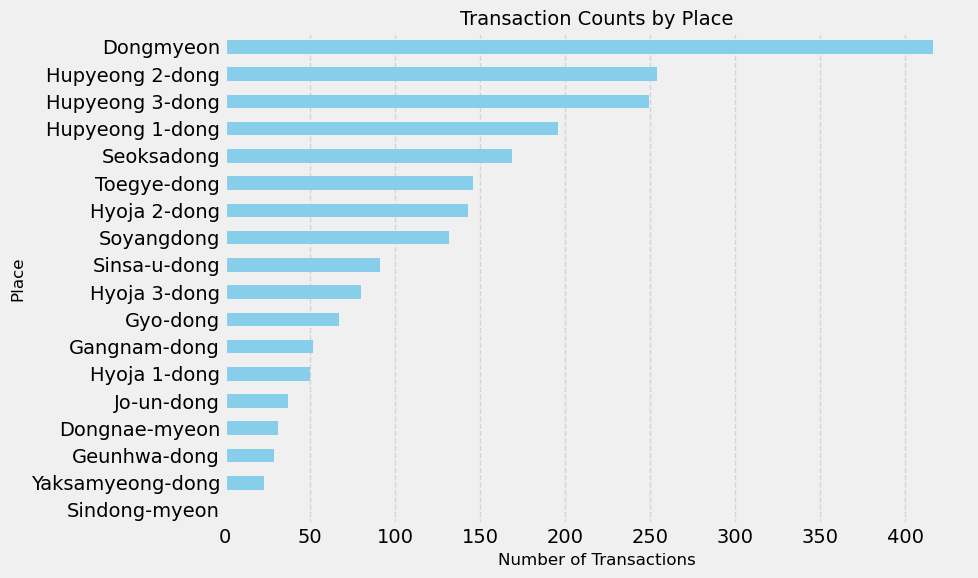

In [34]:
plt.style.use('fivethirtyeight')

# Count the number of transactions for each place and sort in descending order
place_counts = bakery_data['place'].value_counts().sort_values(ascending=True)

# Create the bar chart with switched axes
plt.figure(figsize=(10, 6))
place_counts.plot(kind='barh', color='skyblue')  # 'barh' for horizontal bars

# Add labels and title
plt.title('Transaction Counts by Place', fontsize=14)
plt.ylabel('Place', fontsize=12)
plt.xlabel('Number of Transactions', fontsize=12)

# Add faint grid lines along the x-axis (horizontal grid lines)
plt.grid(axis='x', linestyle='--', alpha=0.75)
# Dropping gridlines from the place axis
plt.grid(axis='y', linestyle='--', alpha=0)

# Show the plot
plt.tight_layout()
plt.show()


This is an interesting look at the success of various selling locations. I am curious as to low-sales locations, like the "Sindong-myeon" location which only has a single sale. Perhaps this is some type of soft-launch or pop-up promotional event?

#### Product Sales

As this is a market basket analysis, I'm mostly concerned with the success of each of the various items sold in the bakery. I'm going to use another bar graph, but this time plotting both the total quantities of each item sold and the total number of transactions each item appears in. We'll use this plot format once again in a little bit, so I'll also save it as a custom function.

Since we know from the earlier `decribe()` call that there are no 'croque monsieur' or 'mad garlic' sales, these two columns can be dropped.

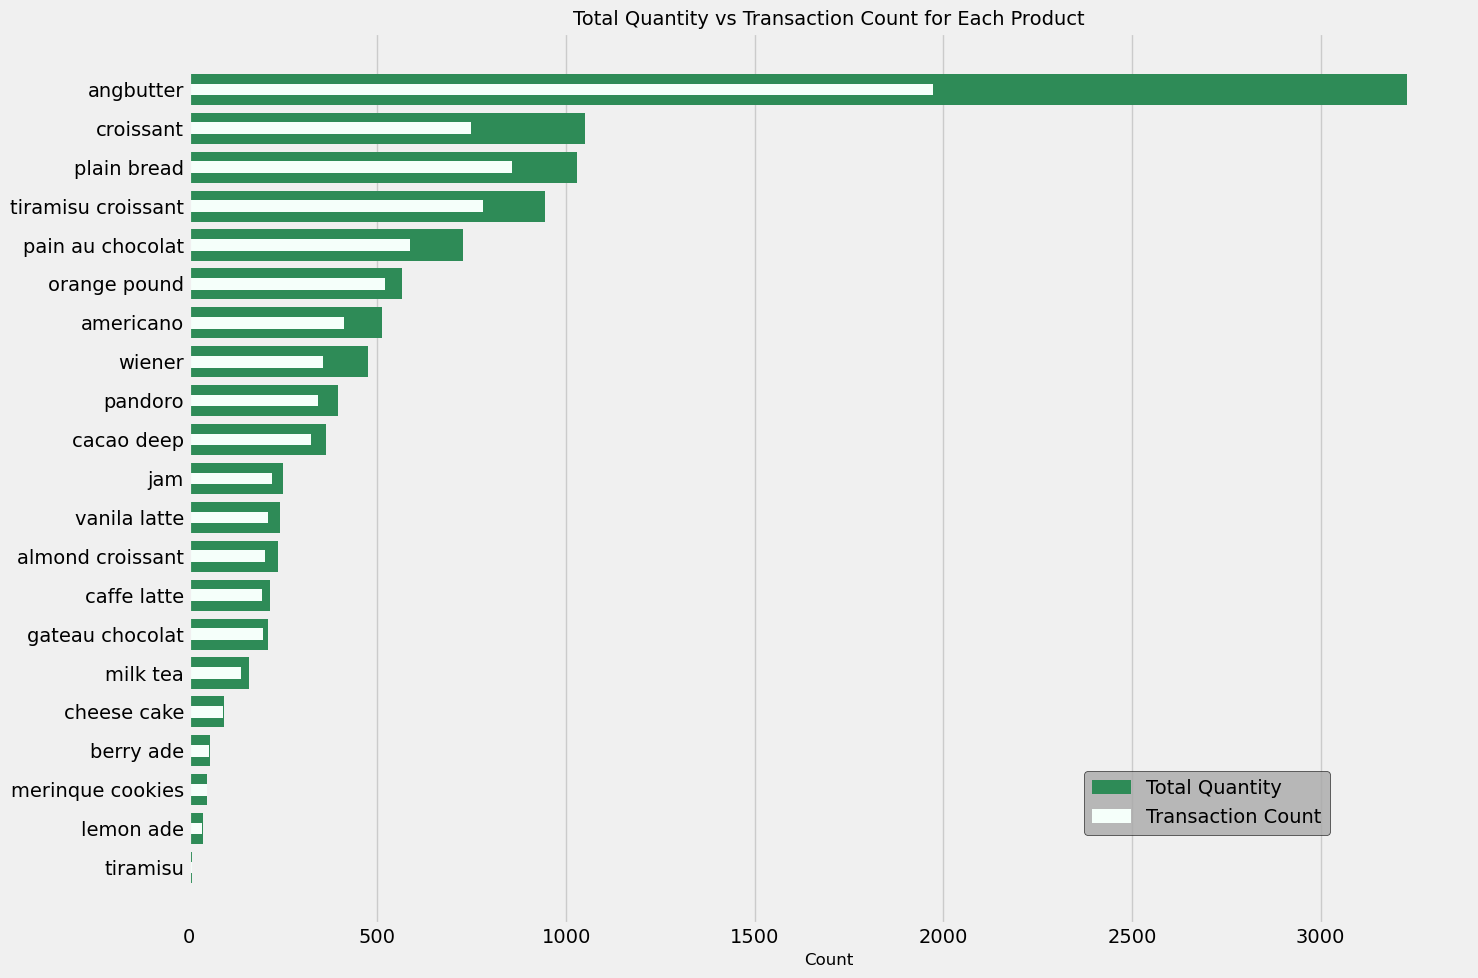

In [35]:
# Drop empty product columns 'croque monsieur' and 'mad garlic'
bakery_data = bakery_data.drop(columns=['croque monsieur', 'mad garlic'])

# List of product columns (replace these with actual product column names from your data)
product_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro',
                   'cheese cake', 'lemon ade', 'orange pound', 'wiener',
                   'vanila latte', 'berry ade', 'tiramisu',  'merinque cookies']

def sales_plot(df, p_cols):
    # 1. Calculate the total quantities of each product across all transactions
    total_quantities = df[p_cols].sum()

    # 2. Calculate the number of transactions each product appears in (i.e., count non-zero entries)
    transaction_counts = (df[p_cols] > 0).sum()

    # 3. Combine both metrics into one DataFrame for easy plotting
    metrics_df = pd.DataFrame({
        'Product': p_cols,
        'Total Quantity': total_quantities,
        'Transaction Count': transaction_counts
    })

    # 4. Sort by Total Quantity (ascending order)
    metrics_df = metrics_df.sort_values(by='Total Quantity', ascending=True)

    # 5. Set up a position range for the bars
    x = range(len(metrics_df))

    # 7. Create a figure and axis object
    fig, ax = plt.subplots(figsize=(15, 10))

    # 8. Plot Total Quantity (larger bar width)
    ax.barh(x, metrics_df['Total Quantity'], 0.8, color='seagreen', label='Total Quantity')

    # 9. Plot Transaction Count (smaller bar width, overlayed on top of Total Quantity)
    ax.barh(x, metrics_df['Transaction Count'], 0.3, color='mintcream', label='Transaction Count')

    # 10. Set labels and title
    ax.set_yticks(x)
    ax.set_yticklabels(metrics_df['Product'])
    ax.set_xlabel('Count', fontsize=12)
    ax.set_title('Total Quantity vs Transaction Count for Each Product', fontsize=14)

    # Move the legend to the upper left corner
    ax.legend(facecolor='darkgray', edgecolor='black', loc=(0.7, 0.1))


    # Dropping gridlines from the product axis
    plt.grid(axis='y', linestyle='--', alpha=0)

    # Show plot
    plt.tight_layout()
    plt.show()

sales_plot(bakery_data, product_columns)

The angbutter pastry is by far the highest-selling single item, and often even sells in multiples per transaction. It must be pretty good!

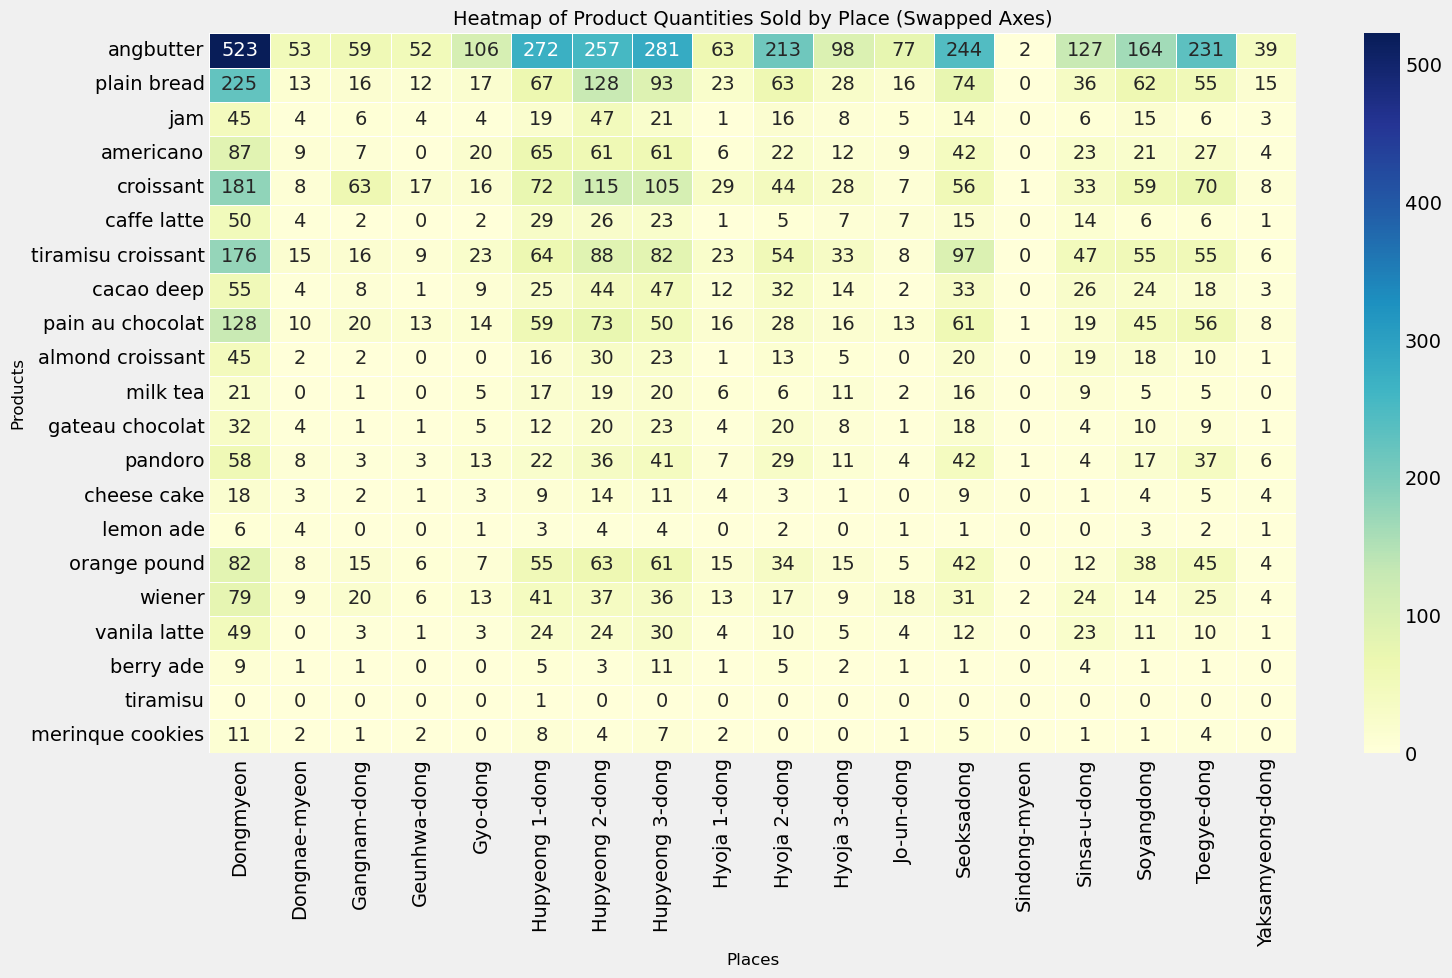

In [36]:
# List of product columns (replace these with actual product column names from your data)
product_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro',
                   'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte',
                   'berry ade', 'tiramisu', 'merinque cookies']

# 1. Group the data by 'place' and sum the quantities for each product
product_place_data = bakery_data.groupby('place')[product_columns].sum()

# 2. Transpose the DataFrame to swap the axes (places become rows and products become columns)
product_place_data = product_place_data.T  # Transpose the DataFrame

# 3. Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(product_place_data, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)

# 4. Set labels and title
plt.xlabel('Places', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Product Quantities Sold by Place (Swapped Axes)', fontsize=14)

# 5. Show the plot
plt.tight_layout()
plt.show()


C:\Users\sbrya\AppData\Local\Temp\ipykernel_63988\3088397974.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = product_place_data_percentage.round(2).applymap(lambda x: f"{x:.1f}%")


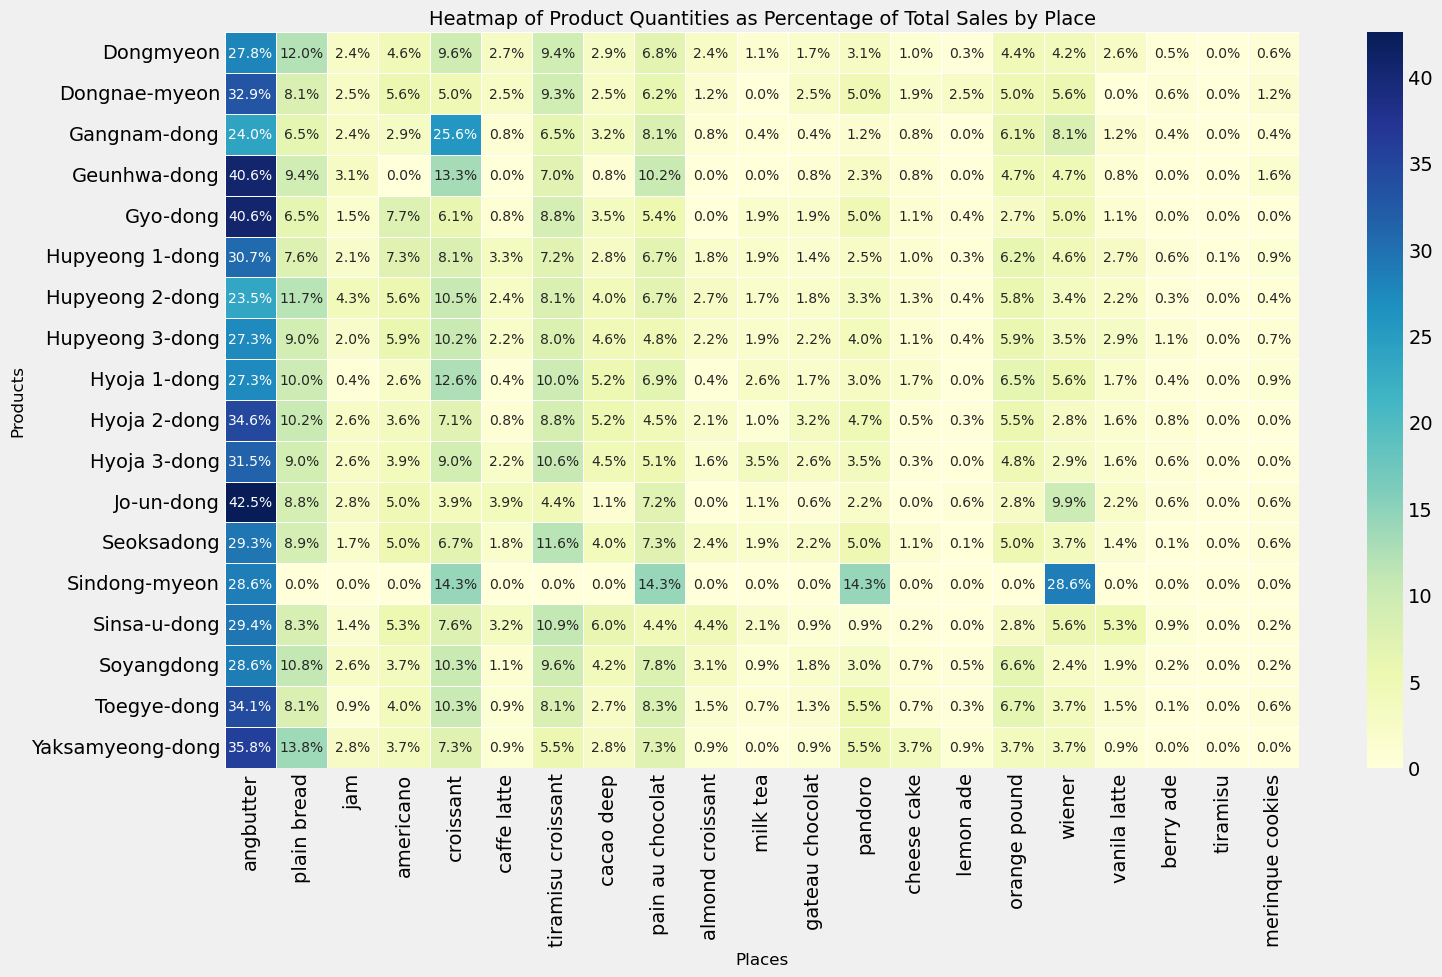

In [37]:
# 1. Group the data by 'place' and sum the quantities for each product
product_place_data = bakery_data.groupby('place')[product_columns].sum()

# 2. Normalize each row by dividing by the row total to get the percentage of total sales per store
product_place_data_percentage = product_place_data.div(product_place_data.sum(axis=1), axis=0) * 100

# 3. Create the heatmap
plt.figure(figsize=(16, 10))  # Increase the figure dimensions

# Create custom annotations with percentage suffix
annot = product_place_data_percentage.round(2).applymap(lambda x: f"{x:.1f}%")

# Create the heatmap
sns.heatmap(product_place_data_percentage, annot=annot, cmap="YlGnBu", linewidths=0.5, annot_kws={'size': 10}, fmt='')

# 4. Set labels and title
plt.xlabel('Places', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Product Quantities as Percentage of Total Sales by Place', fontsize=14)

# 5. Show the plot
plt.tight_layout()
plt.show()

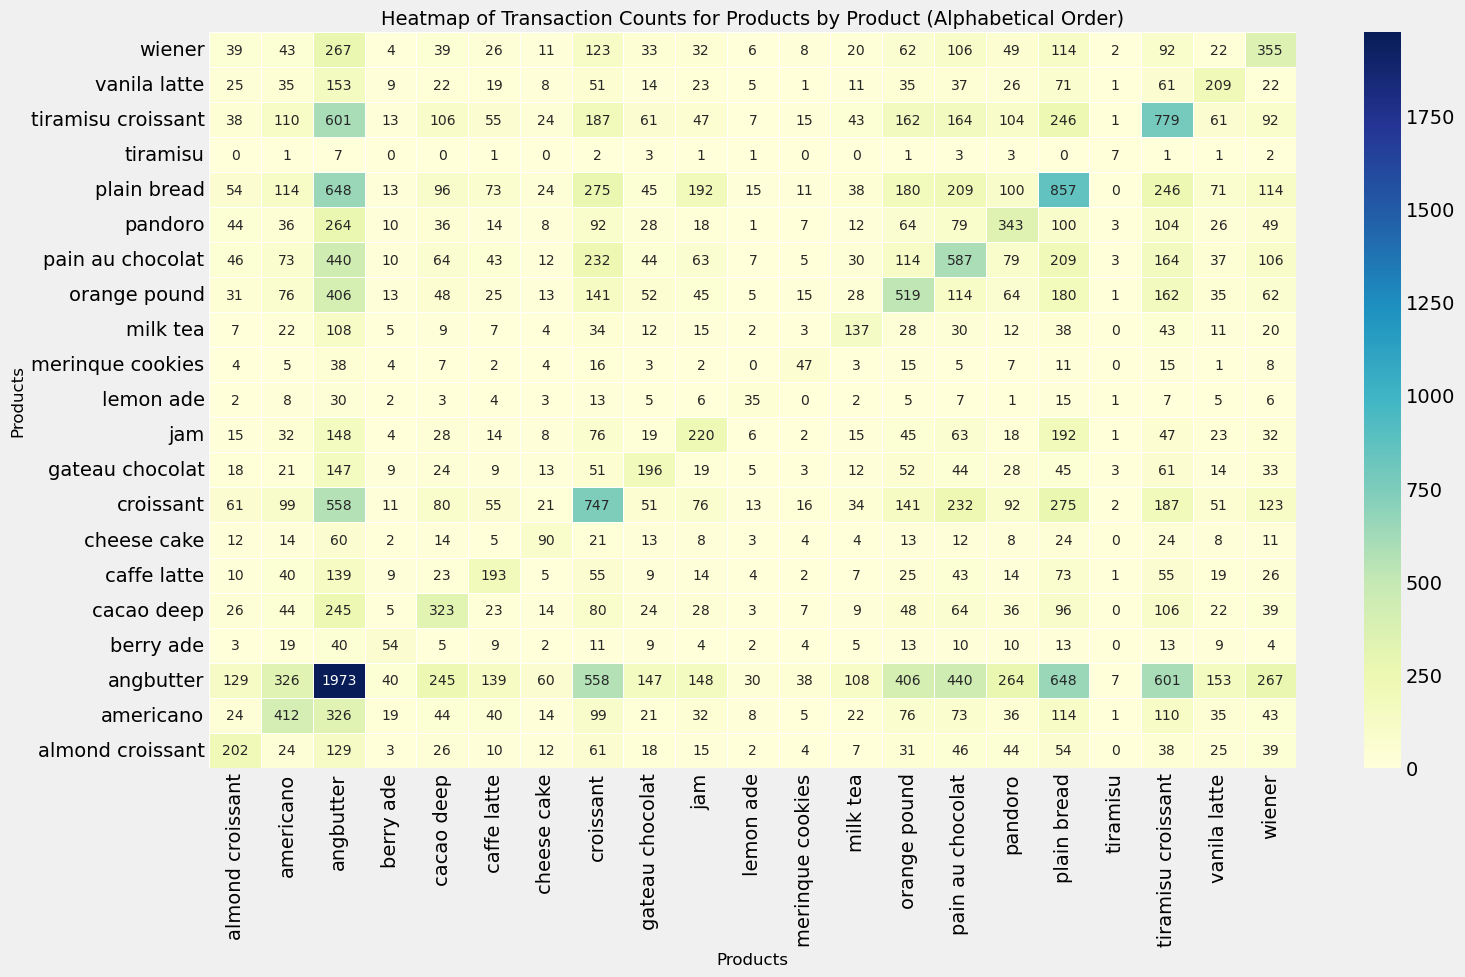

In [38]:


# 1. Create a binary matrix indicating if a product was purchased in a transaction
product_binary_data = bakery_data[product_columns].gt(0).astype(int)

# 2. Create a product co-occurrence matrix by multiplying the binary matrix with its transpose
co_occurrence_matrix = product_binary_data.T.dot(product_binary_data)

# 3. Sort the matrix rows and columns alphabetically (ascending)
sorted_co_occurrence_matrix = co_occurrence_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1)

# 4. Plot the heatmap of product co-occurrence counts
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.heatmap(sorted_co_occurrence_matrix, annot=True, annot_kws={'size': 10}, fmt="d", cmap="YlGnBu", linewidths=0.5)

# 5. Set labels and title
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Transaction Counts for Products by Product (Alphabetical Order)', fontsize=14)

# 6. Show the plot
plt.tight_layout()
plt.show()


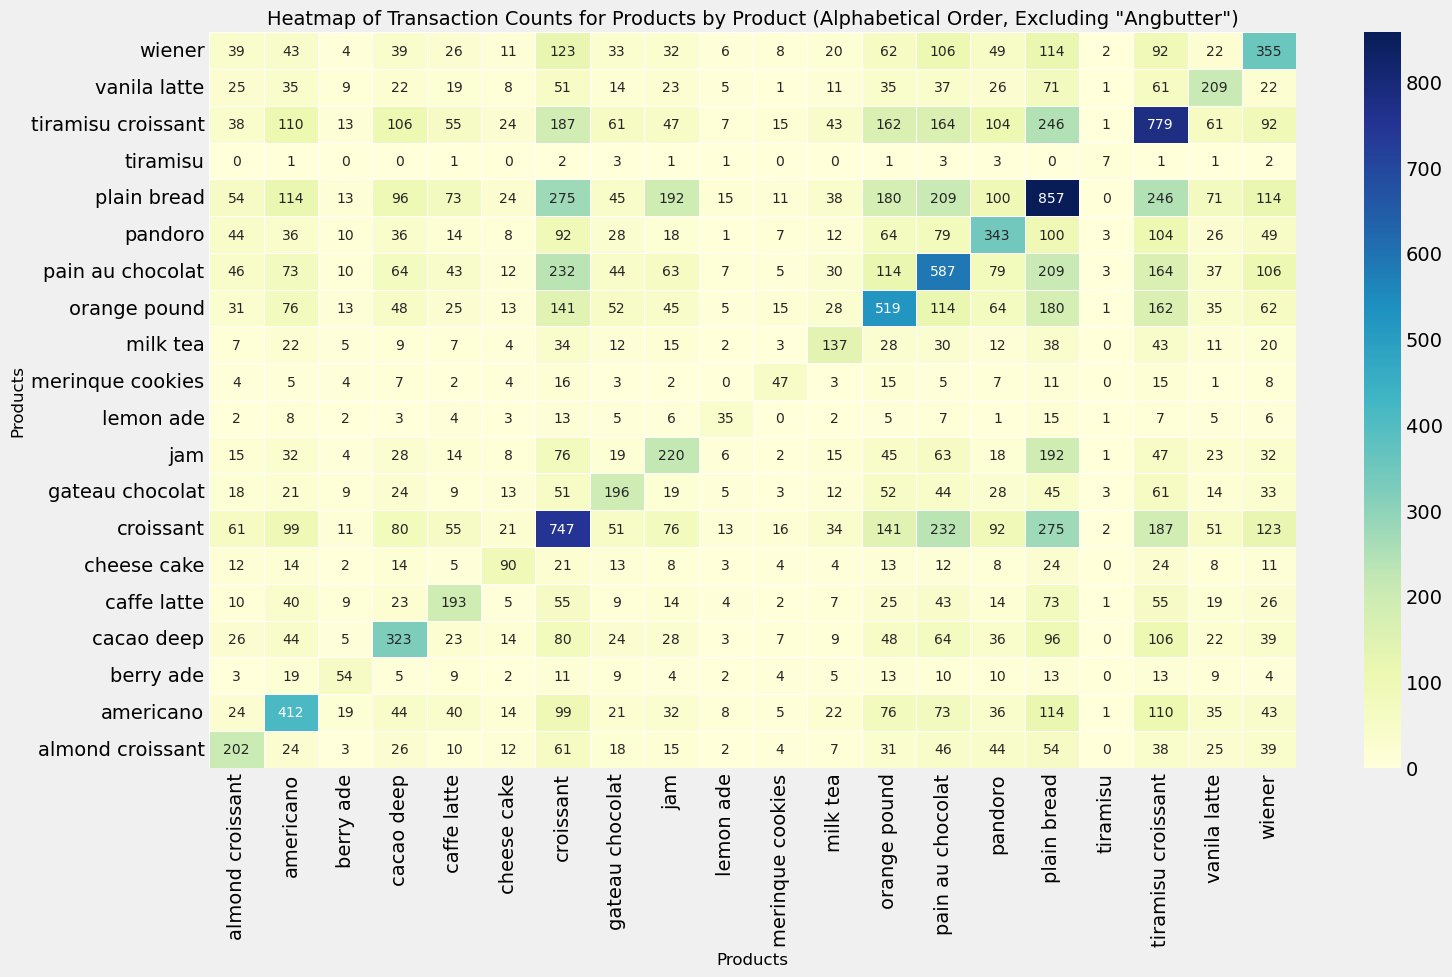

In [39]:
# List of product columns (without 'angbutter')
sans_angbutter = ['plain bread', 'jam', 'americano', 'croissant', 
                   'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 
                   'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro', 
                   'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte',
                   'berry ade', 'tiramisu', 'merinque cookies']

# 1. Create a binary matrix indicating if a product was purchased in a transaction
product_binary_data = bakery_data[sans_angbutter].gt(0).astype(int)

# 2. Create a product co-occurrence matrix by multiplying the binary matrix with its transpose
co_occurrence_matrix = product_binary_data.T.dot(product_binary_data)

# 3. Sort the matrix rows and columns alphabetically (ascending)
sorted_co_occurrence_matrix = co_occurrence_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1)

# 4. Plot the heatmap of product co-occurrence counts
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.heatmap(sorted_co_occurrence_matrix, annot=True, annot_kws={'size': 10}, fmt="d", cmap="YlGnBu", linewidths=0.5)

# 5. Set labels and title
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Transaction Counts for Products by Product (Alphabetical Order, Excluding "Angbutter")', fontsize=14)

# 6. Show the plot
plt.tight_layout()
plt.show()


#### Sales by Weekday

C:\Users\sbrya\AppData\Local\Temp\ipykernel_63988\676401419.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, palette="Blues_d")


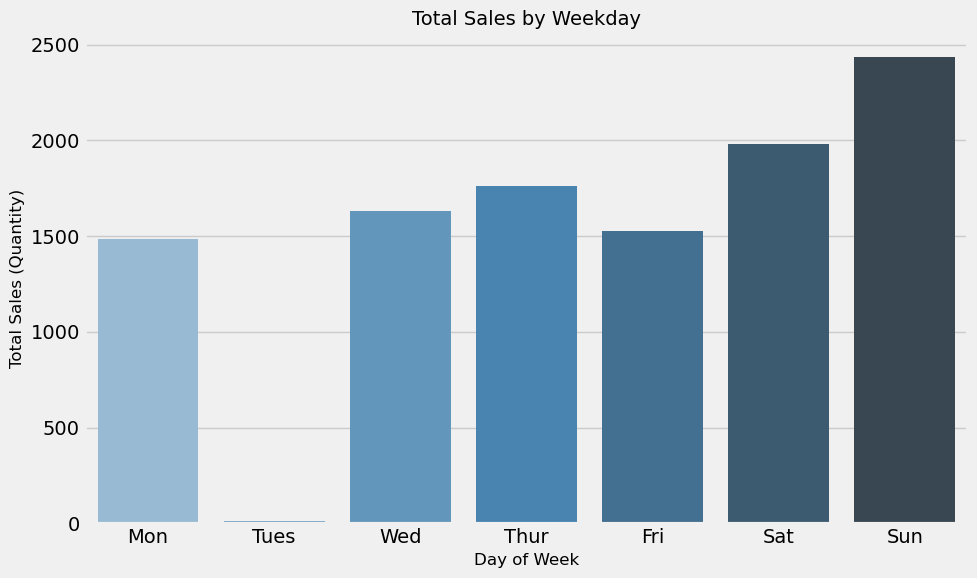

In [40]:
# Sum the total sales by day of the week
bakery_data['total_sales'] = bakery_data[product_columns].sum(axis=1)
sales_by_weekday = bakery_data.groupby('day of week')['total_sales'].sum()

# Reorder the days of the week for correct order in the plot
ordered_weekdays = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
sales_by_weekday = sales_by_weekday[ordered_weekdays]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values, palette="Blues_d")

# Add labels and title
plt.title('Total Sales by Weekday', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales (Quantity)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


It's noticeable that there are minimal transactions that occur on Tuesday, but not zero. It's likely that for the most part, all bakery locations are closed on Tuesday, with some special exception(s).

In [41]:
# Filter rows where the 'datetime' is on a Tuesday
tuesday_sales = bakery_data[bakery_data['day of week'] == 'Tues']

# Drop columns where all values are NaN
tuesday_sales = tuesday_sales.dropna(axis=1, how='all')

# Display the rows for Tuesday with cleaned columns
print(tuesday_sales.to_markdown())

|      | datetime            | day of week   |   total | place           |   angbutter |   americano |   tiramisu croissant |   gateau chocolat |   cheese cake |   wiener |   merinque cookies |   total_sales |
|-----:|:--------------------|:--------------|--------:|:----------------|------------:|------------:|---------------------:|------------------:|--------------:|---------:|-------------------:|--------------:|
| 1277 | 2019-12-24 11:13:00 | Tues          |   15300 | Dongmyeon       |           1 |           1 |                    1 |               nan |           nan |      nan |                nan |             3 |
| 1278 | 2019-12-24 11:17:00 | Tues          |   21400 | Jo-un-dong      |           3 |         nan |                  nan |               nan |           nan |        2 |                nan |             5 |
| 1279 | 2019-12-24 13:14:00 | Tues          |   19300 | Hupyeong 1-dong |         nan |         nan |                    1 |                 1 |             1 

These Tuesday sales all happened on Christmas Eve! Maybe the transaction was part of some kind of employee Christmas party?

#### Sales Over Time

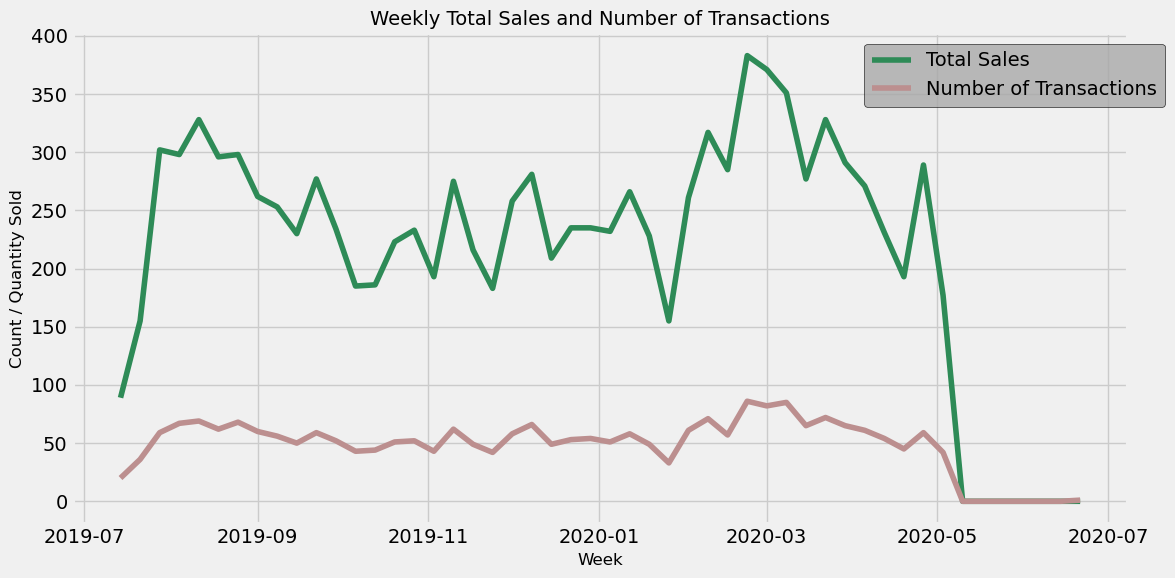

In [42]:
# Create a copy of the original DataFrame (without modifying it) and name it "bakery_ts"
bakery_ts = bakery_data.copy()

# Ensure the 'datetime' column is in the correct datetime format
bakery_ts['datetime'] = pd.to_datetime(bakery_ts['datetime'])

# Set 'datetime' as the index for easier time series manipulation
bakery_ts.set_index('datetime', inplace=True)

# Aggregate the total sales for all products per transaction
bakery_ts['total_sales'] = bakery_ts[product_columns].sum(axis=1)

# Resample the total sales by week (weekly level of detail)
weekly_sales = bakery_ts['total_sales'].resample('W').sum()

# Resample the number of transactions (count of rows) by week
weekly_transactions = bakery_ts.resample('W').size()

# Plot the line chart for total product sales and number of transactions over time
plt.figure(figsize=(12, 6))

# Plot total sales line
plt.plot(weekly_sales.index, weekly_sales.values, label='Total Sales', color='seagreen')

# Plot transaction count line
plt.plot(weekly_transactions.index, weekly_transactions.values, label='Number of Transactions', color='rosybrown')

# Adding labels and title
plt.title('Weekly Total Sales and Number of Transactions', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Count / Quantity Sold', fontsize=12)

# Move the legend to the upper left corner
plt.legend(facecolor='darkgray', edgecolor='black', loc=(0.75, 0.85))

# Display the plot
plt.tight_layout()
plt.show()


There is a tail at the end of this line graph seemingly caused by a data entry error. This observation occurs in June of 2020, well after the rest of the observations were recorded. It also does not record the sales of any items, despite representing a transaction occurance. Might as well remove this empty row of data.

In [43]:
# Review all entries after the start of May 2020
print(bakery_ts[bakery_ts.index > "2020-05-01"][['day of week', 'total_sales']])

# This observation contains no item sales, and is out of the date range
print(bakery_data[bakery_data['datetime']=='2020-06-18 14:52:00'])

                    day of week  total_sales
datetime                                    
2020-05-01 11:09:00         Fri          7.0
2020-05-01 11:10:00         Fri          4.0
2020-05-01 11:32:00         Fri          3.0
2020-05-01 11:47:00         Fri          4.0
2020-05-01 12:00:00         Fri          7.0
2020-05-01 12:10:00         Fri          4.0
2020-05-01 13:05:00         Fri          6.0
2020-05-01 13:55:00         Fri          5.0
2020-05-01 15:03:00         Fri          3.0
2020-05-01 15:19:00         Fri          3.0
2020-05-02 11:37:00         Sat          4.0
2020-05-02 11:39:00         Sat          4.0
2020-05-02 12:15:00         Sat          3.0
2020-05-02 13:45:00         Sat          3.0
2020-05-02 14:45:00         Sat          5.0
2020-06-18 14:52:00         NaN          0.0
                datetime day of week  total place  angbutter  plain bread  \
2653 2020-06-18 14:52:00         NaN    NaN   NaN        NaN          NaN   

      jam  americano  croissant  ca

## Full Basket Analysis

Since this dataset is relatvely small and features a limited selection of products, we can start off by taking a look at market basket metrics across all individual items. First, the product columns need to be converted from the current sales quantity format to an updated one-hot encoded format.

In [69]:
# Select columns related to items (food items)
item_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 
                'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 
                'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade',
                'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 'merinque cookies']

# Create a basket where each column represents an item and 1 indicates a purchase of that item
basket = bakery_data[item_columns].applymap(lambda x: 1 if x > 0 else 0)

C:\Users\sbrya\AppData\Local\Temp\ipykernel_63988\1603261429.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = bakery_data[item_columns].applymap(lambda x: 1 if x > 0 else 0)


#### Apriori
With the product columns encoded as binary values, the Apriori algorithm can be applied to the bakery data to filter out rules which are not frequent. The algorithm works by pruning the family branches of subset itemsets that have low support, under the reasoning that these subsets will also have equally-or-lower support. The following diagram better illustrates how branches are pruned:

![Node Diagram of the Apriori Algorithm with Low-Support Branches Pruned](https://github.com/bryantjay/Portfolio/blob/main/Korean%20Bakery%20Market%20Basket%20Analysis/source_files/apriori_diagram.png?raw=true)

(* I should mention that I sourced this specific image from [here](https://www.kaggle.com/code/akhilram7/affinity-analysis-of-market-basket) though variants of this same diagram are common across most discussions on Apriori. I'm not sure if the Apriori creators Rakesh Agrawal and Ramakrishnan Srikant also created this diagram, or if it was a later contribution.)

We can utilize `mlxtend`'s `apriori` function to create a list of frequent itemsets. The parameter `min_support` support defines the support threshold by which to prune itemsets. As this dataset contains one product (the "angbutter" pastry) that dominates product sales, I'm going to keep the support threshold relatively low at 5%, so that some of the more subtle and interesting rules can be observed.

In [70]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.05 (5%)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

print(frequent_itemsets)

     support                                      itemsets
0   0.743406                                   (angbutter)
1   0.322909                                 (plain bread)
2   0.082894                                         (jam)
3   0.155237                                   (americano)
4   0.281462                                   (croissant)
5   0.072720                                 (caffe latte)
6   0.293519                          (tiramisu croissant)
7   0.121703                                  (cacao deep)
8   0.221176                            (pain au chocolat)
9   0.076112                            (almond croissant)
10  0.051620                                    (milk tea)
11  0.073851                             (gateau chocolat)
12  0.129239                                     (pandoro)
13  0.195554                                (orange pound)
14  0.133760                                      (wiener)
15  0.078749                                (vanila latt

c:\Users\sbrya\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Association Rules

With our data pruned of infrequent itemsets, we can generate our rules of association between various products and itemsets. This is done through `mlxtend`'s `association_rules` function. This function also contains a threshold parameter which can filter our association rules by any result metric of the association rules function. In this case, I'm still exploring how the itemsets interact, so like in the `apriori` function, I'll keep this threshold set to 5% support for now. I won't be discussing the representativity, Jaccard, certainty, or Kulczynski metrics in this project; these will be dropped from the output.

In [71]:
# Generate association rules with a minimum support of 0.05 (5%)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.05, num_itemsets=4000)

rules = rules.drop(columns=['representativity', 'jaccard', 'certainty', 'kulczynski'])

# Show the first 5 association rules
print(rules.head())


     antecedents    consequents  antecedent support  consequent support  \
0  (plain bread)    (angbutter)            0.322909            0.743406   
1    (angbutter)  (plain bread)            0.743406            0.322909   
2          (jam)    (angbutter)            0.082894            0.743406   
3    (angbutter)          (jam)            0.743406            0.082894   
4    (americano)    (angbutter)            0.155237            0.743406   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.244160    0.756126  1.017110  0.004107    1.052157       0.024845  
1  0.244160    0.328434  1.017110  0.004107    1.008227       0.065560  
2  0.055765    0.672727  0.904926 -0.005859    0.784037      -0.102785  
3  0.055765    0.075013  0.904926 -0.005859    0.991480      -0.290505  
4  0.122833    0.791262  1.064374  0.007429    1.229263       0.071595  


We have a successful output. Let's iterate over the columns and view each metric sorted high-to-low.

In [72]:
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

for col in cols:
    print(col, "\n---\n", \
        rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False), '\n')

support 
---
              antecedents                      consequents   support
0          (plain bread)                      (angbutter)  0.244160
1            (angbutter)                    (plain bread)  0.244160
10  (tiramisu croissant)                      (angbutter)  0.226451
11           (angbutter)             (tiramisu croissant)  0.226451
6            (croissant)                      (angbutter)  0.210249
..                   ...                              ...       ...
63           (angbutter)  (plain bread, pain au chocolat)  0.053504
41           (croissant)                   (orange pound)  0.053127
40        (orange pound)                      (croissant)  0.053127
8          (caffe latte)                      (angbutter)  0.052374
9            (angbutter)                    (caffe latte)  0.052374

[70 rows x 3 columns] 

confidence 
---
              antecedents                      consequents  confidence
27                 (jam)                    (plain bread) 

Some quick observattions:
- The products "plain bread" and "jam" seem to have an interesting relationship that stands out from any other item, in terms of confidence, lift, leverage, conviction, and Zhang's metric.
- Higher confidence values tend to have "angbutter" as the consequent itemset, while lower confidence values have that same item as an antecedent.
- There seems to be a lot of multi-item purchases between popular products like angbutter, croissants, and pains au chocolat.

#### Association Plots

Let's plot each metric to get a feel for how they are distributed across all the rules.

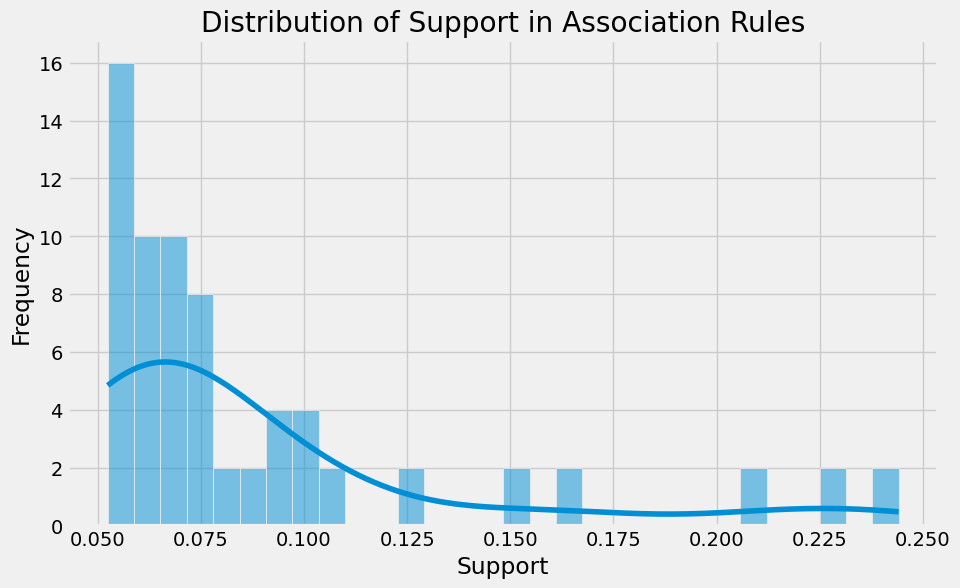

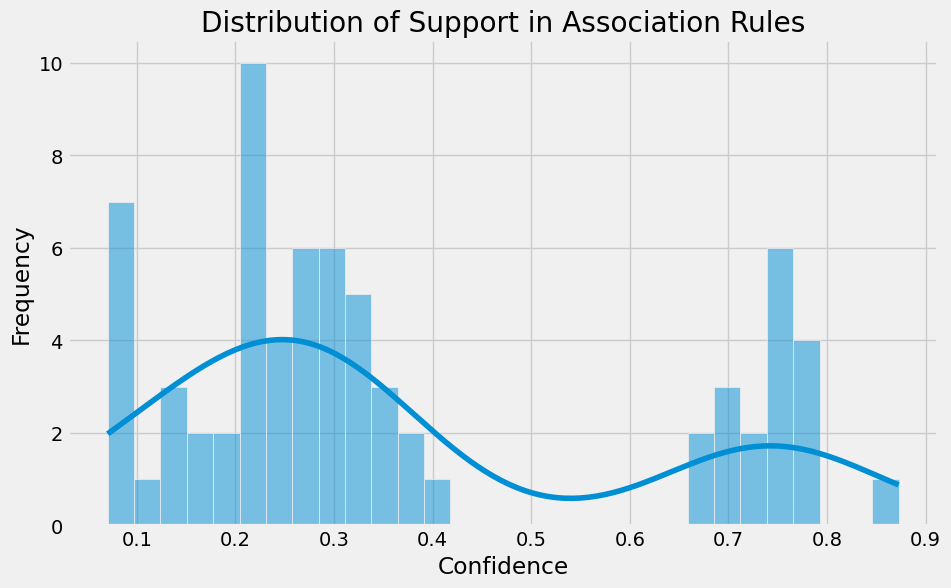

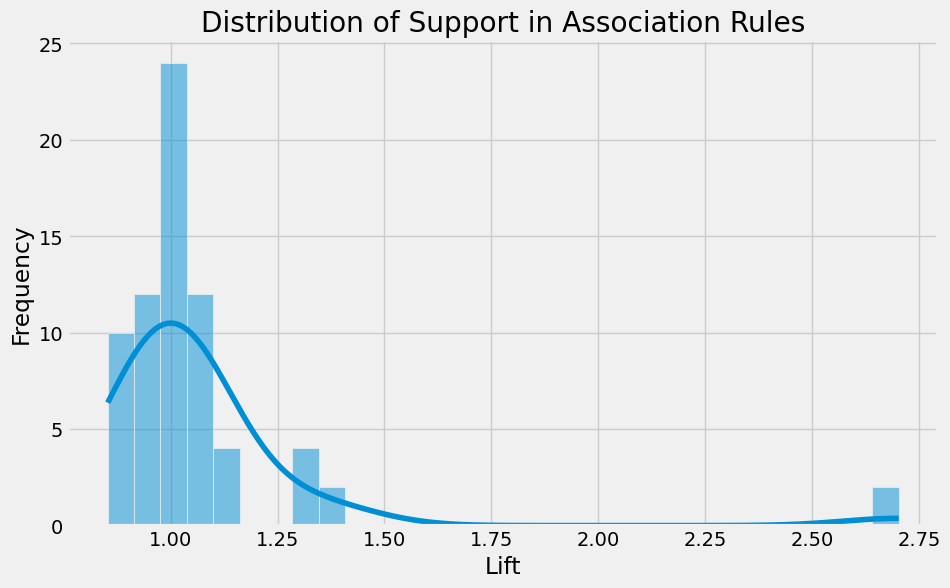

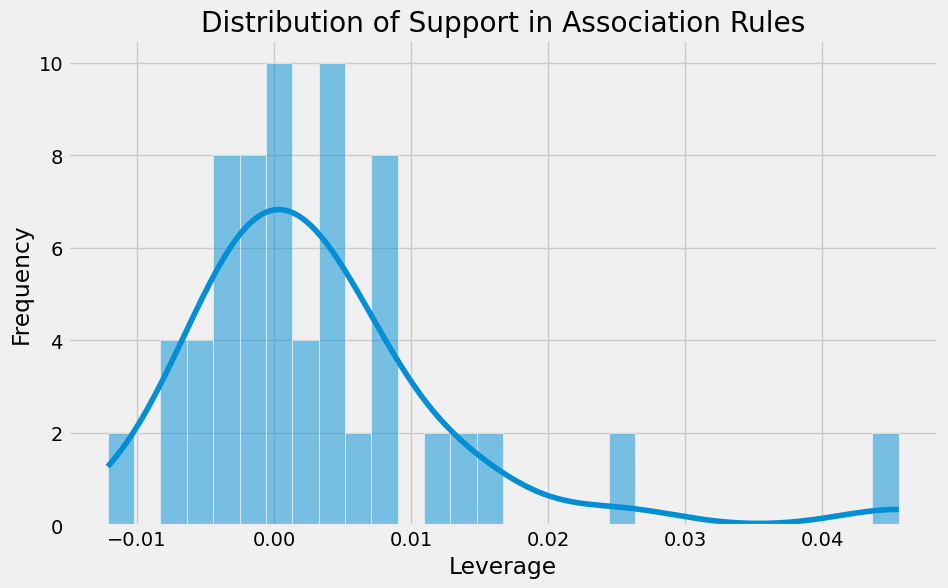

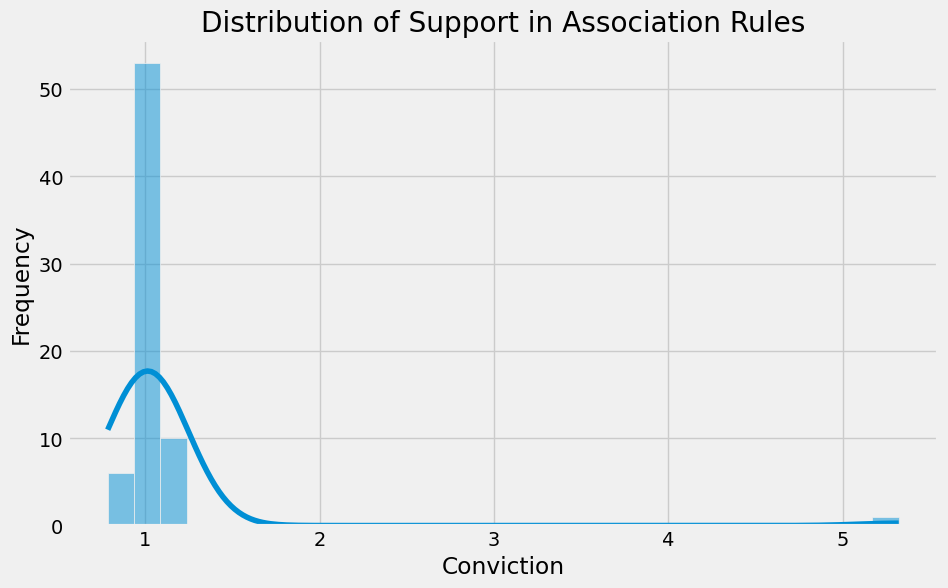

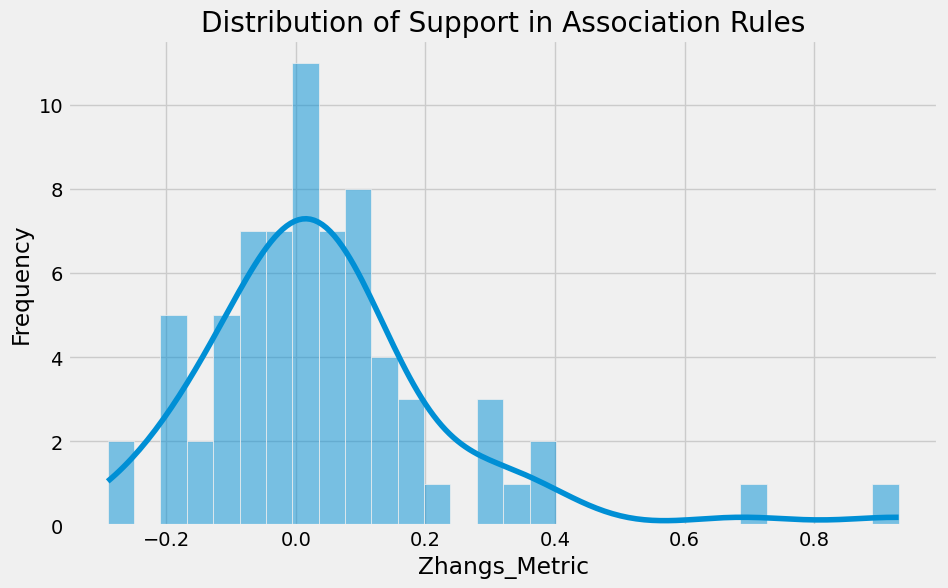

In [73]:
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(rules[col], bins=30, kde=True)
    plt.title('Distribution of Support in Association Rules')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()

The "lift" and "conviction" distributions are a bit difficult to view due to the presence of an outlier on each graph. Here's a more easily-discernable version for each:

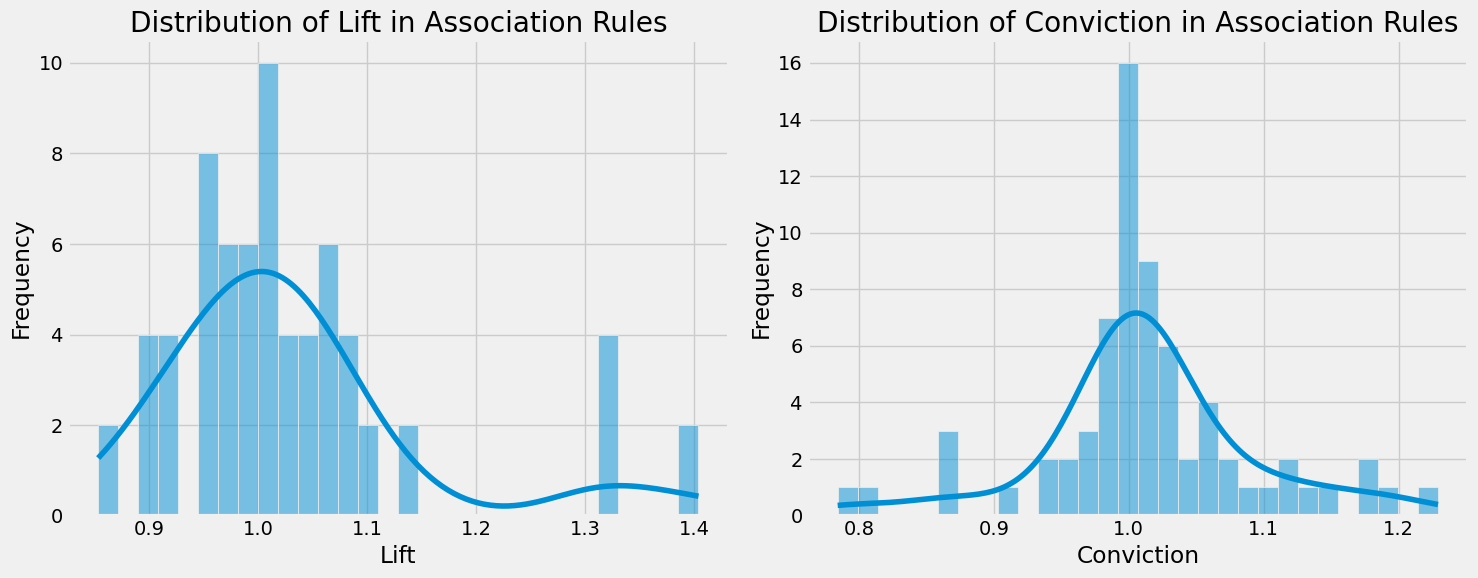

In [82]:
# Filter rules for lift and conviction
sans_toast_lift = rules[rules['lift'] < 2.5]
sans_toast_conviction = rules[rules['conviction'] < 5]

# Function to plot the distribution
def plot_distribution(data, ax, column, title):
    sns.histplot(data[column], bins=30, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column.title())
    ax.set_ylabel('Frequency')

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Lift distribution
plot_distribution(sans_toast_lift, axes[0], 'lift', 'Distribution of Lift in Association Rules')

# Plot Conviction distribution
plot_distribution(sans_toast_conviction, axes[1], 'conviction', 'Distribution of Conviction in Association Rules')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Observations:
- The support metric is not uniform, meaning there are a small number of high-support rules which are outweighing the larger number of low-support(less frequent) rules.
  - These high support rules are all between popular items like "angbutter", "plain bread", and "croissant".
- The confidence metric is bimodal. Confidence heavily favors rules with high-support consequents, and disfavors rules with high-support antecedent; this bimodal pattern could be portraying that dynamic.
- All other metrics seem to be normally distributed, although they are also skewed towards some high outliers (especially lift and conviction).
  - These outliers all seem to specifically reference the association between "plain bread" and "jam".

Let's see if we can pinpoint any interesting rules by filtering to include on high results for each particular metric.

In [ ]:
# Filter rules with high lift (greater than 2) and confidence (greater than 0.5)
high_lift_rules = rules[
    ((rules['confidence'] > 0.6) |
    (rules['lift'] > 1.25) |
    (rules['leverage'] > 0.01) |
    (rules['conviction'] > 1.1) |
    (rules['zhangs_metric'] > 0.2)) &
    (rules['zhangs_metric'] > 0)
]

# Show the filtered high-quality rules
print(high_lift_rules.to_markdown())

|    | antecedents                                      | consequents                                  |   antecedent support |   consequent support |   support |   confidence |     lift |     leverage |   conviction |   zhangs_metric |
|---:|:-------------------------------------------------|:---------------------------------------------|---------------------:|---------------------:|----------:|-------------:|---------:|-------------:|-------------:|----------------:|
|  0 | frozenset({'plain bread'})                       | frozenset({'angbutter'})                     |            0.322909  |            0.743406  | 0.24416   |     0.756126 | 1.01711  |  0.00410735  |     1.05216  |      0.0248451  |
|  2 | frozenset({'jam'})                               | frozenset({'angbutter'})                     |            0.0828937 |            0.743406  | 0.0557649 |     0.672727 | 0.904926 | -0.00585884  |     0.784037 |     -0.102785   |
|  4 | frozenset({'americano'})                     

In [ ]:
# Filter rules with high lift (greater than 2) and confidence (greater than 0.5)
high_lift_rules = rules[
    ((rules['leverage'] > 0.004) & (rules['confidence'] > 0.6) & (rules['conviction'] > 1.1)) |  # Top-performing angbutter combinations
    ((rules['confidence'] > 0.3) & (rules['leverage'] > 0.01))  # Bread combinations
]

# Show the filtered high-quality rules
print(high_lift_rules.to_markdown())

|    | antecedents                                  | consequents                     |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:---------------------------------------------|:--------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
|  4 | frozenset({'americano'})                     | frozenset({'angbutter'})        |            0.155237  |             0.743406 | 0.122833  |     0.791262 | 1.06437 | 0.00742903 |      1.22926 |       0.0715947 |
| 10 | frozenset({'tiramisu croissant'})            | frozenset({'angbutter'})        |            0.293519  |             0.743406 | 0.226451  |     0.771502 | 1.03779 | 0.00824664 |      1.12296 |       0.051547  |
| 20 | frozenset({'orange pound'})                  | frozenset({'angbutter'})        |            0.195554  |             0.743406 

## Aggregated Items

In my experience, when I visit a bakery, cafe, or coffeeshop, I tend to vary my drink orders deending on what I'm feeling at any given moment. Coffee or tea? Iced or hot? Espresso shot or decaf? The decsions can vary pretty wildly, but ultimately I'll usually decide on some type of drink and (sometimes) a food item. Some people may not order food, and some people may order doubles or triples of something. This is a good scenario for aggregation.

**Aggregation** in Market Basket Analysis is the process of grouping items together based on some criteria(s). If you're selling t-shirts, perhaps you could group shirts by color or by size. Ultimately, it may not be a specific brand which matters to a shopper, but any product that can sufficiently fill a need. We've skipped any initial aggregations thus far, as the data is small enough and it's always good to views how the basket relates as-is on the smallest level of detail. Sometimes, aggregation may need to be employed first before any significant basket metrics can be pull from the data, if the dataset is too large.

In the case of this dataset, I've noticed a few broad characteristics by which we can categorize. First, there's a small selection of croissants, includng regular, almond, chocolate ('pain au chocolat'), and tiramisu. There's also an assortment of cakes and cake-like pastries: 'gateau chocolat', 'pandoro', 'cheese cake', 'orange pound', 'tiramisu'. I also noticed a selection of drinks or to break it down further, a selection of coffee-drinks and a selection of less-caffeineted options. I opted to include "milk tea" with the fruitier "refresher" options, since I usually think of it as being a bit lighter than coffee and often flavored wth fruit; others may disagree. I declined from placing 'cacao deep' into any categories because, quite honestly, I can't figure out what this is.

In [51]:
bakery_agg = bakery_data.copy()

bakery_agg = bakery_agg.drop(columns='total_sales')


# Dictionary of columns to categorize and aggregate
categories = {
    'coffees': ['americano', 'vanila latte', 'caffe latte'],
    'cakes': ['gateau chocolat', 'pandoro', 'cheese cake', 'orange pound', 'tiramisu'],
    'croissants': ['croissant', 'tiramisu croissant', 'pain au chocolat', 'almond croissant'],
    'refreshments': ['lemon ade', 'berry ade', 'milk tea']
}

# Loop through each category to aggregate the fields and drop the original columns
for category, columns in categories.items():
    bakery_agg[category] = bakery_agg[columns].sum(axis=1)
    bakery_agg = bakery_agg.drop(columns=columns)


print(bakery_agg.head().to_markdown())

|    | datetime            | day of week   |   total |   place |   angbutter |   plain bread |   jam |   cacao deep |   wiener |   merinque cookies |   coffees |   cakes |   croissants |   refreshments |
|---:|:--------------------|:--------------|--------:|--------:|------------:|--------------:|------:|-------------:|---------:|-------------------:|----------:|--------:|-------------:|---------------:|
|  0 | 2019-07-11 15:35:00 | Thur          |   23800 |     nan |           1 |           nan |   nan |          nan |      nan |                nan |         2 |       0 |            3 |              0 |
|  1 | 2019-07-11 16:10:00 | Thur          |   15800 |     nan |           1 |           nan |   nan |          nan |      nan |                nan |         0 |       1 |            1 |              0 |
|  2 | 2019-07-12 11:49:00 | Fri           |   58000 |     nan |         nan |           nan |   nan |          nan |      nan |                nan |         0 |       0 |           14

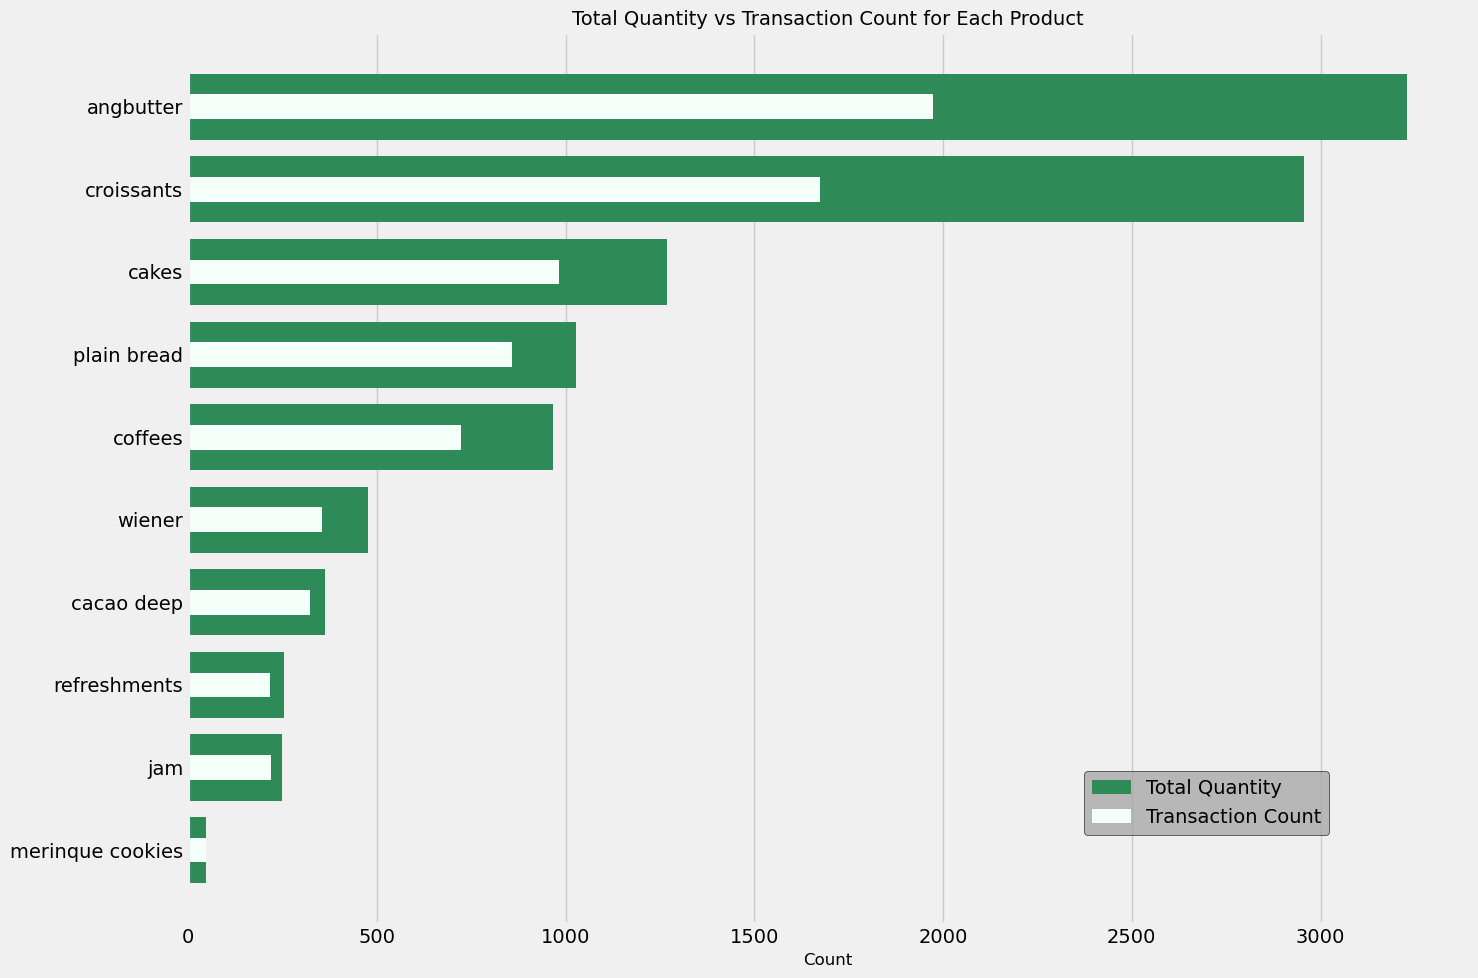

In [52]:
# List of product columns (replace these with actual product column names from your data)
product_columns = ['angbutter', 'plain bread', 'jam', 'cacao deep', 'wiener', 'merinque cookies', 'coffees', 'cakes', 'croissants', 'refreshments']

sales_plot(bakery_agg, product_columns)

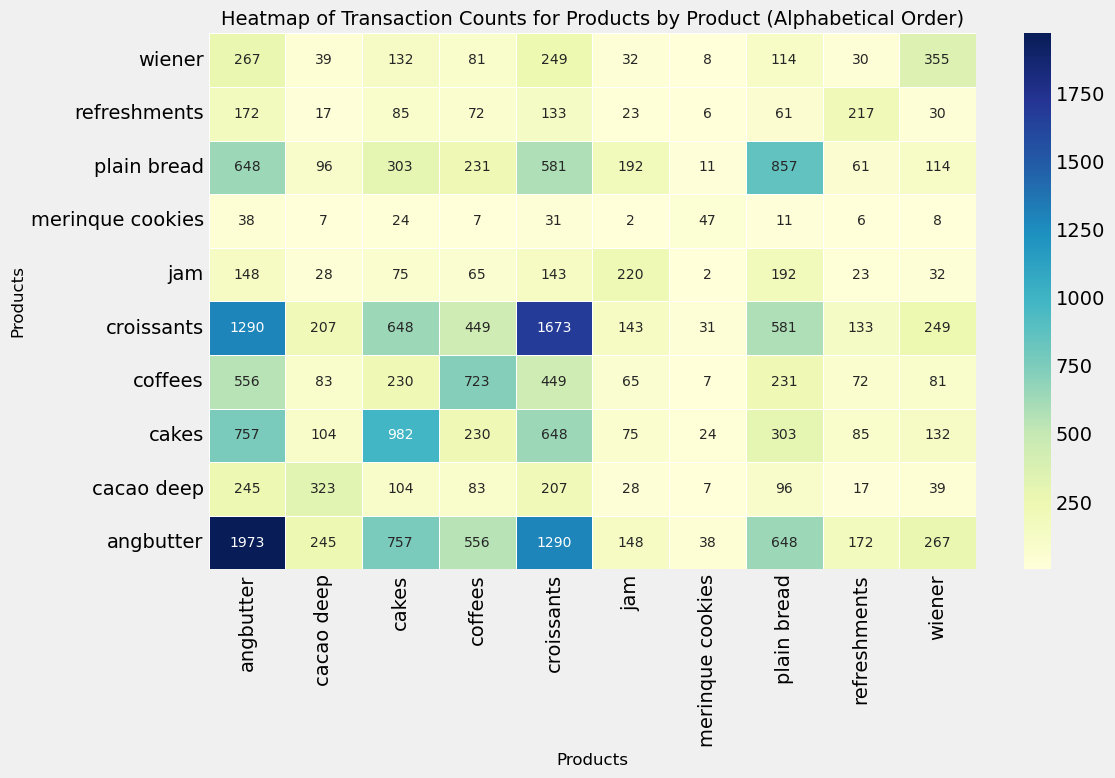

In [53]:
# 1. Create a binary matrix indicating if a product was purchased in a transaction
product_binary_data = bakery_agg[product_columns].gt(0).astype(int)

# 2. Create a product co-occurrence matrix by multiplying the binary matrix with its transpose
co_occurrence_matrix = product_binary_data.T.dot(product_binary_data)

# 3. Sort the matrix rows and columns alphabetically (ascending)
sorted_co_occurrence_matrix = co_occurrence_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1)

# 4. Plot the heatmap of product co-occurrence counts
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(sorted_co_occurrence_matrix, annot=True, annot_kws={'size': 10}, fmt="d", cmap="YlGnBu", linewidths=0.5)

# 5. Set labels and title
plt.xlabel('Products', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Heatmap of Transaction Counts for Products by Product (Alphabetical Order)', fontsize=14)

# 6. Show the plot
plt.tight_layout()
plt.show()


In [54]:
# Create a basket where each column represents an item and 1 indicates a purchase of that item
basket = bakery_agg[product_columns].map(lambda x: 1 if x > 0 else 0)

basket

,angbutter,plain bread,jam,cacao deep,wiener,merinque cookies,coffees,cakes,croissants,refreshments
0,1,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2649,0,0,0,0,0,0,0,0,0,0
2650,0,0,0,0,0,0,0,0,0,0
2651,0,0,0,0,0,0,0,0,0,0
2652,0,0,0,0,0,0,0,0,0,0


In [55]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.1 (10%)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.05, num_itemsets=4000)

rules = rules.drop(columns=['representativity', 'jaccard', 'certainty', 'kulczynski'])

# Show the first 10 association rules
print(rules.to_markdown())

|    | antecedents                              | consequents                              |   antecedent support |   consequent support |   support |   confidence |     lift |     leverage |   conviction |   zhangs_metric |
|---:|:-----------------------------------------|:-----------------------------------------|---------------------:|---------------------:|----------:|-------------:|---------:|-------------:|-------------:|----------------:|
|  0 | frozenset({'plain bread'})               | frozenset({'angbutter'})                 |            0.322909  |            0.743406  | 0.24416   |    0.756126  | 1.01711  |  0.00410735  |     1.05216  |      0.0248451  |
|  1 | frozenset({'angbutter'})                 | frozenset({'plain bread'})               |            0.743406  |            0.322909  | 0.24416   |    0.328434  | 1.01711  |  0.00410735  |     1.00823  |      0.0655604  |
|  2 | frozenset({'jam'})                       | frozenset({'angbutter'})                 |        

c:\Users\sbrya\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [56]:
cols = ['support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']
grid_cols = ['antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']

for col in cols:
    print(col, "\n---\n", \
        rules[['antecedents', 'consequents', col]].sort_values(col, ascending=False), '\n')

support 
---
        antecedents                consequents   support
13    (croissants)                (angbutter)  0.486059
12     (angbutter)               (croissants)  0.486059
10         (cakes)                (angbutter)  0.285230
11     (angbutter)                    (cakes)  0.285230
0    (plain bread)                (angbutter)  0.244160
..             ...                        ...       ...
89   (plain bread)      (coffees, croissants)  0.050867
90       (coffees)  (plain bread, croissants)  0.050867
91    (croissants)     (plain bread, coffees)  0.050867
36  (refreshments)               (croissants)  0.050113
37    (croissants)             (refreshments)  0.050113

[98 rows x 3 columns] 

confidence 
---
        antecedents               consequents  confidence
17           (jam)             (plain bread)    0.872727
14  (refreshments)               (angbutter)    0.792627
13    (croissants)               (angbutter)    0.771070
10         (cakes)               (angbutter)

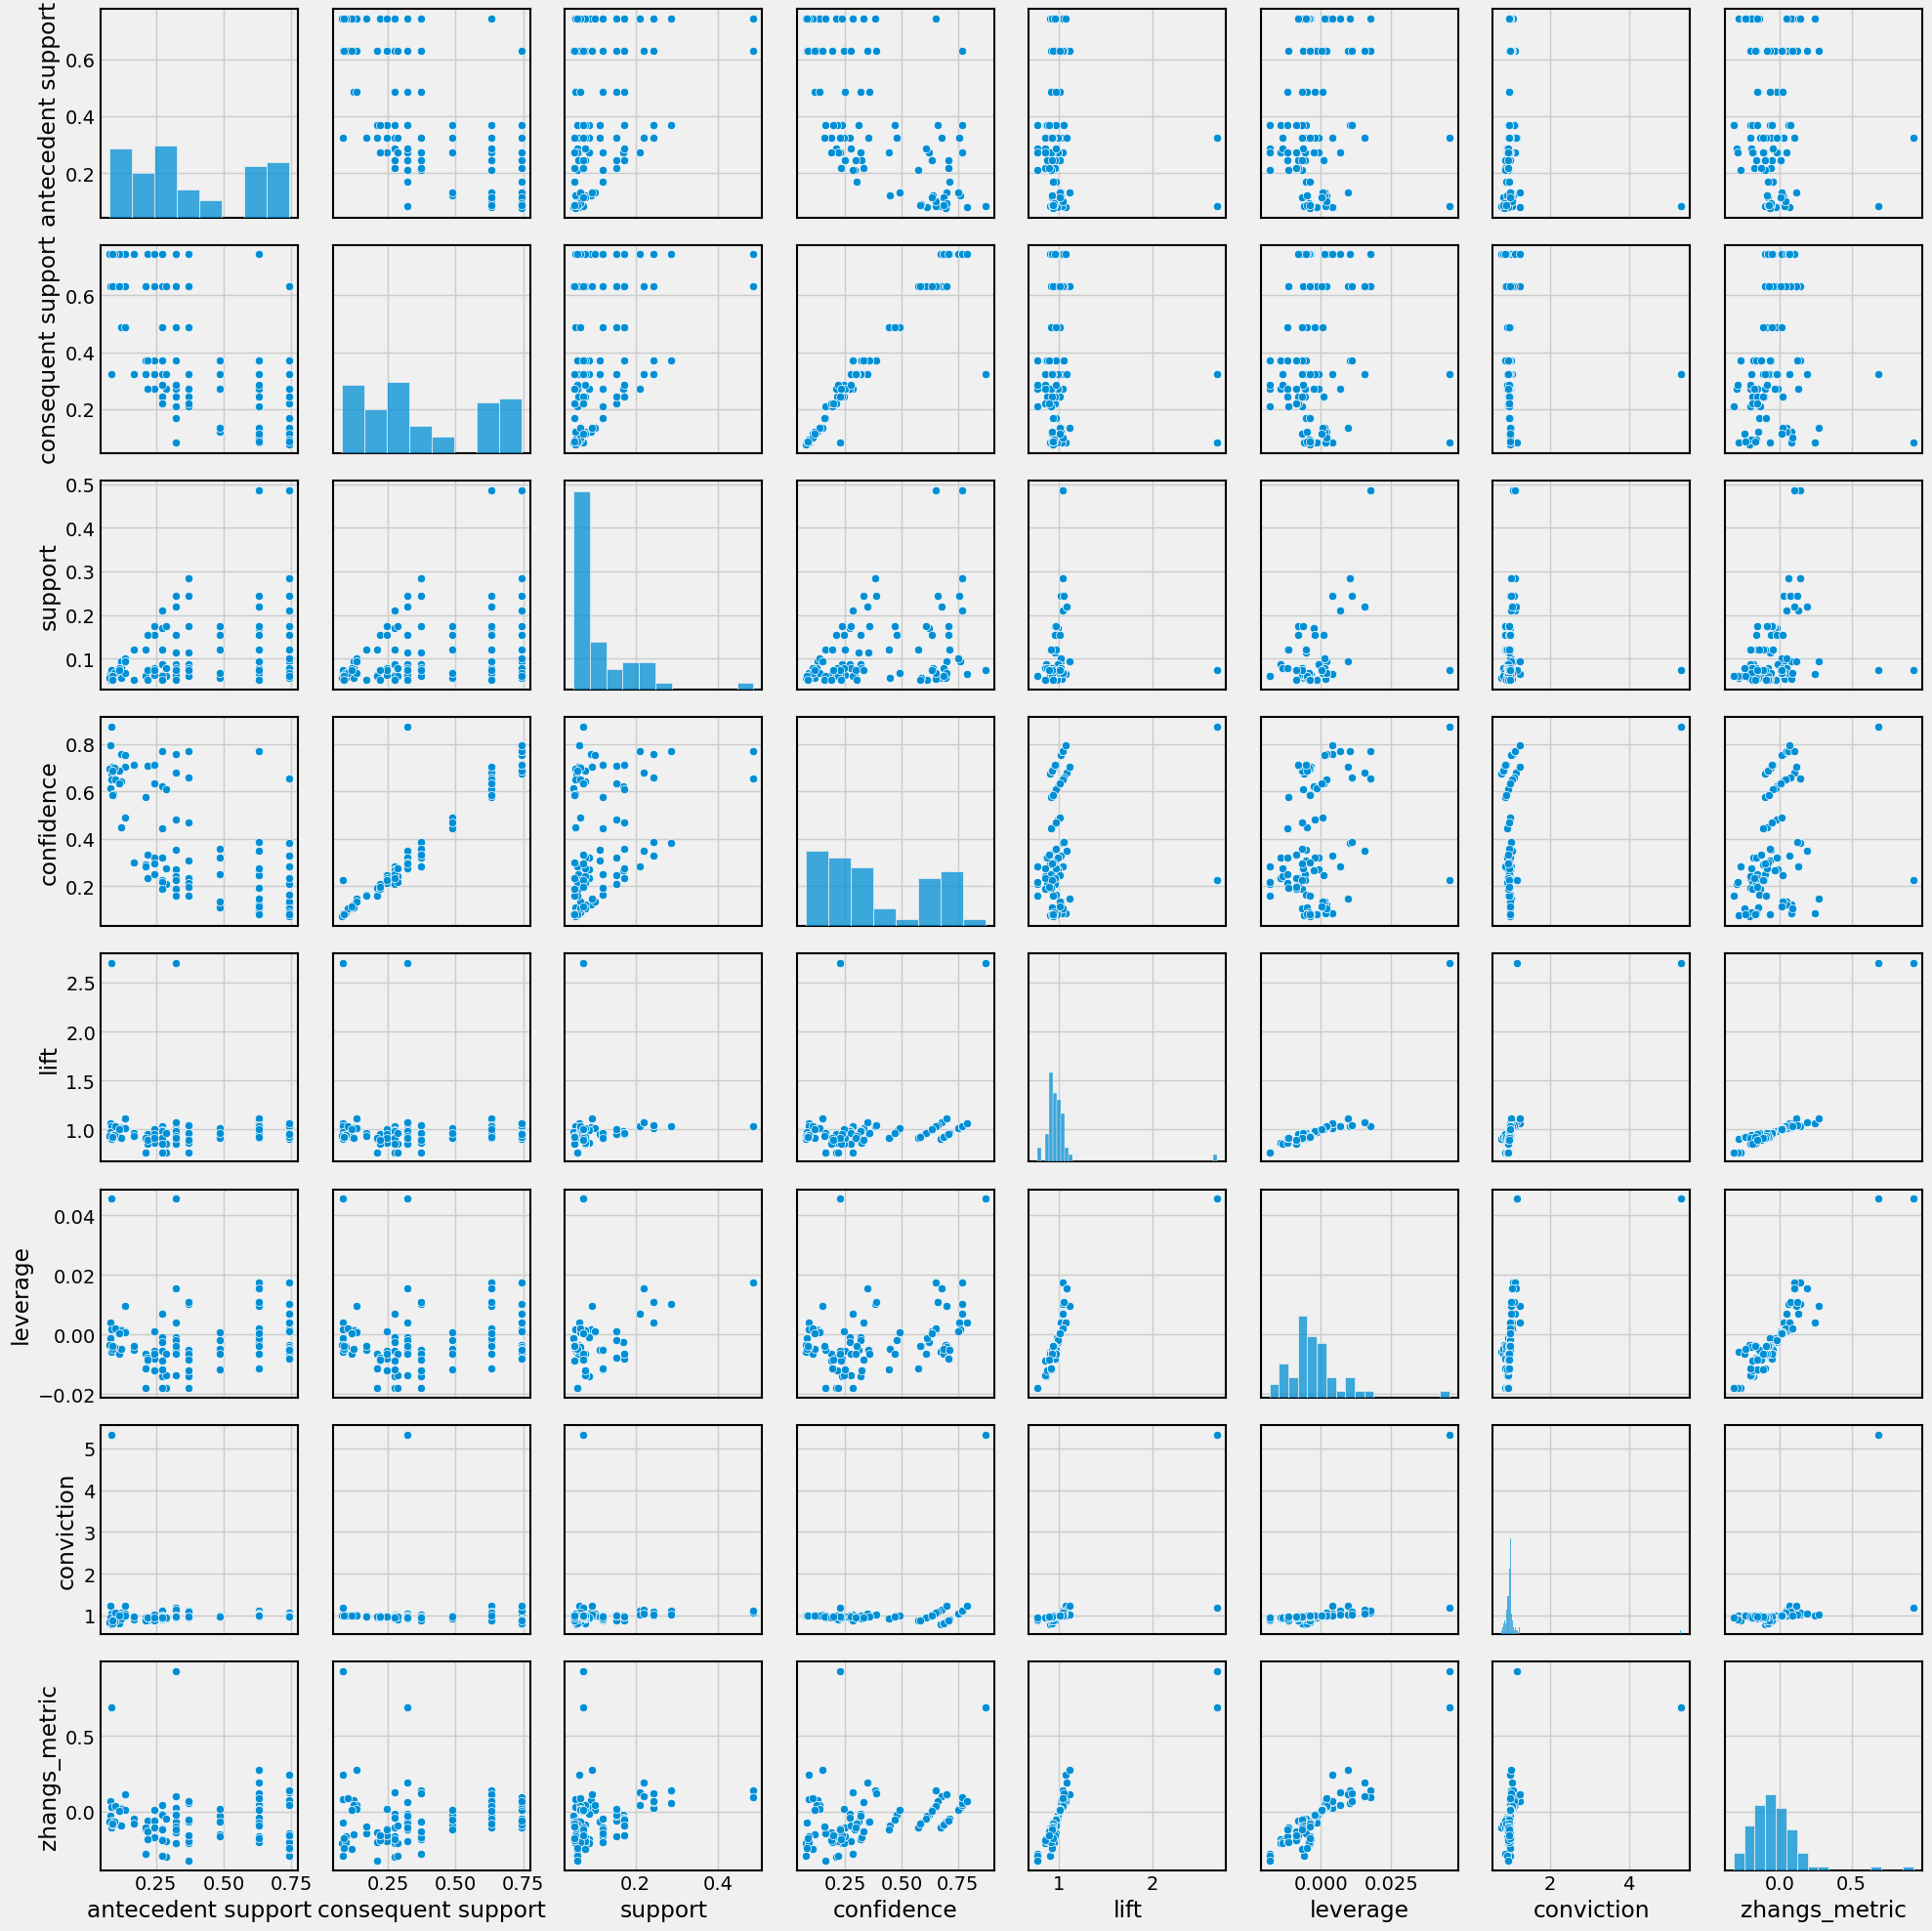

In [57]:
g = sns.pairplot(rules[grid_cols])

# Add borders to each subplot (axes) in the pairplot
for ax in g.axes.flatten():
    for _, spine in ax.spines.items():
        spine.set_visible(True)  # Ensure spines are visible
        spine.set_linewidth(1.5)  # Set border line width
        spine.set_edgecolor('black')  # Set border color

# Show the plot
plt.tight_layout()
plt.show()

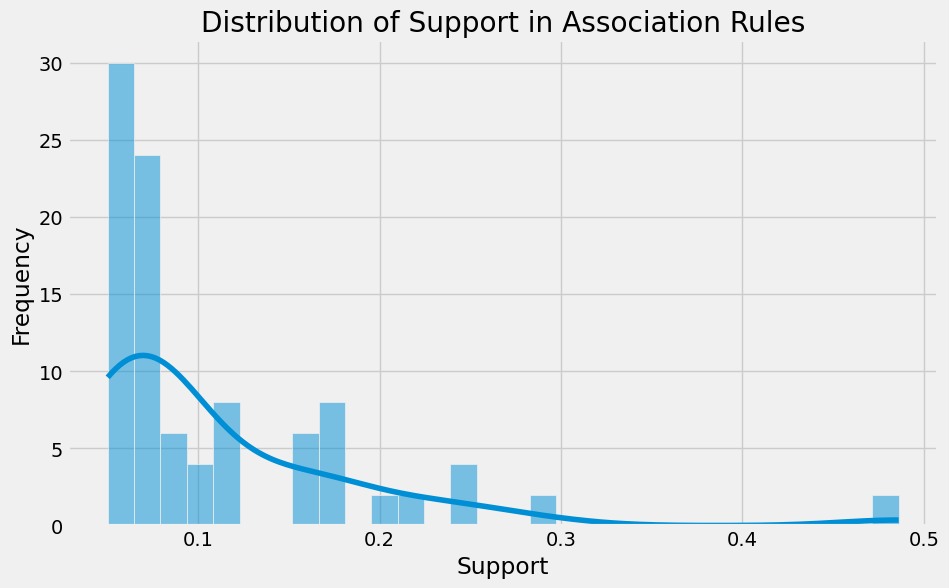

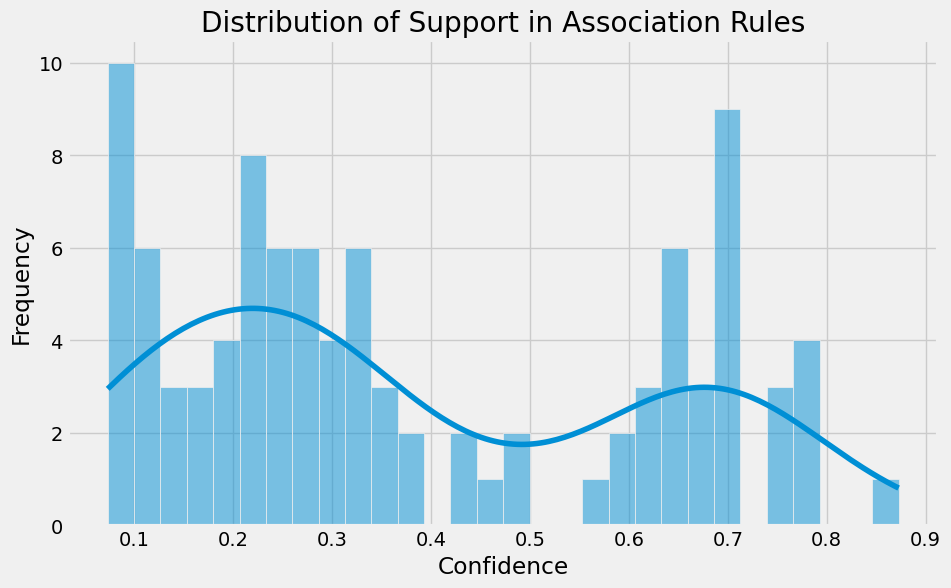

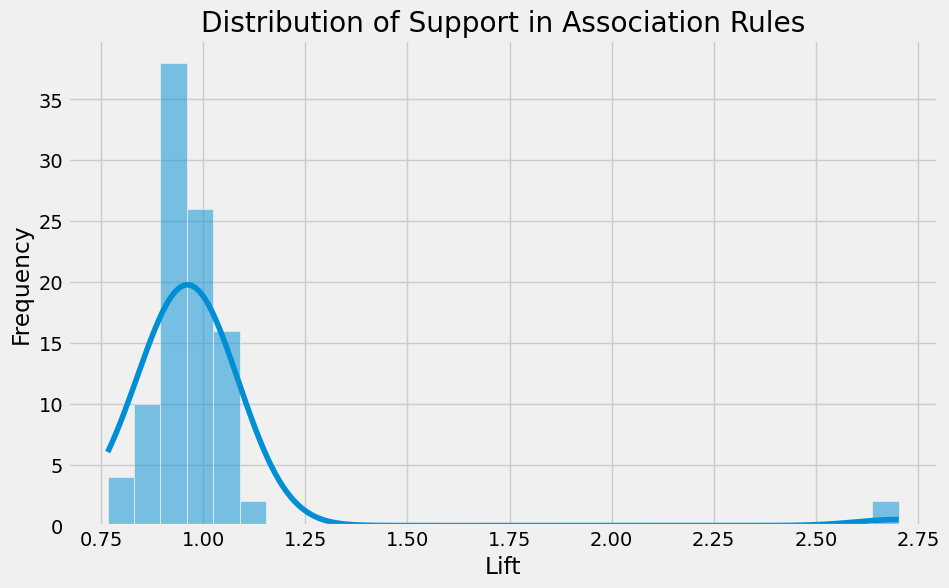

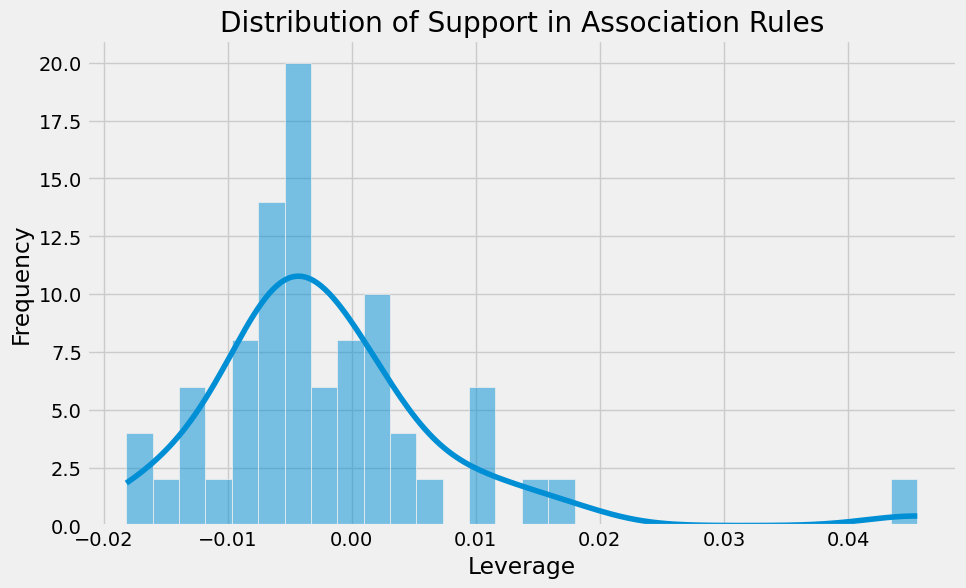

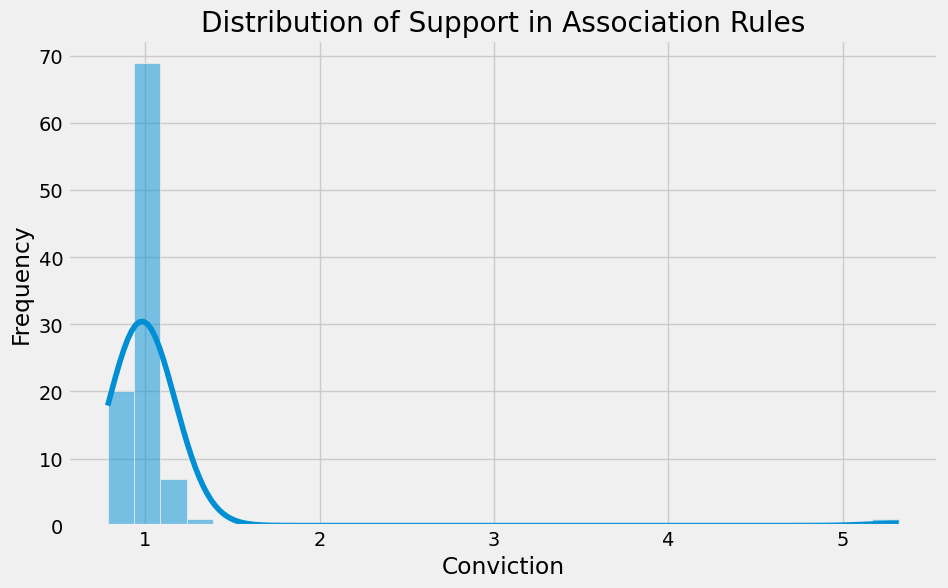

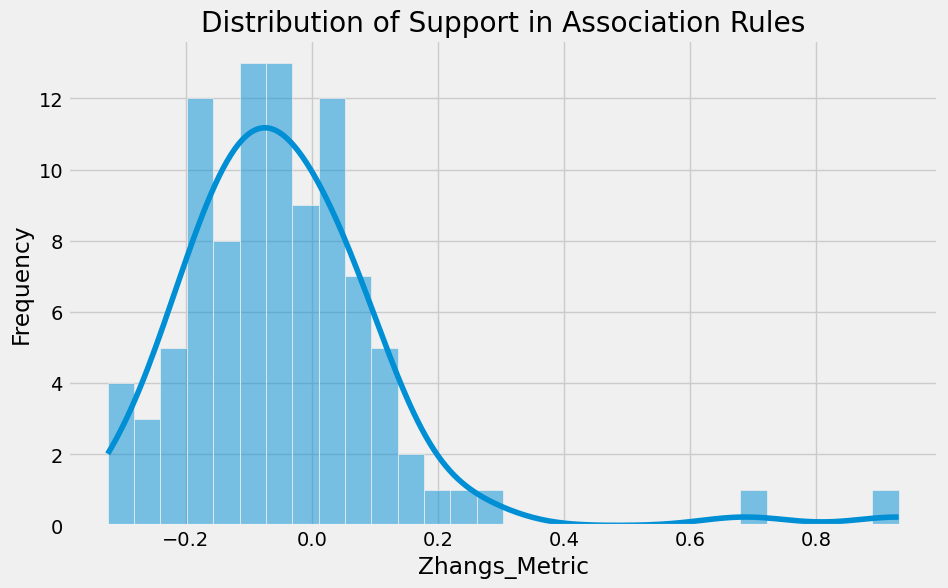

In [58]:
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(rules[col], bins=30, kde=True)
    plt.title('Distribution of Support in Association Rules')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.show()

#### Highest Confidence

As a reminder, confidence is highly related to and influenced by the support metric, meaning the overall frequency of an item or group of items within all transactions. We expect rules featuring high-support consequents to also have high confidence levels, regardless of rule reliability. To illustrate what I'm saying, here's the scatterplot of 'consequent support' vs 'confidence' for this basket data:

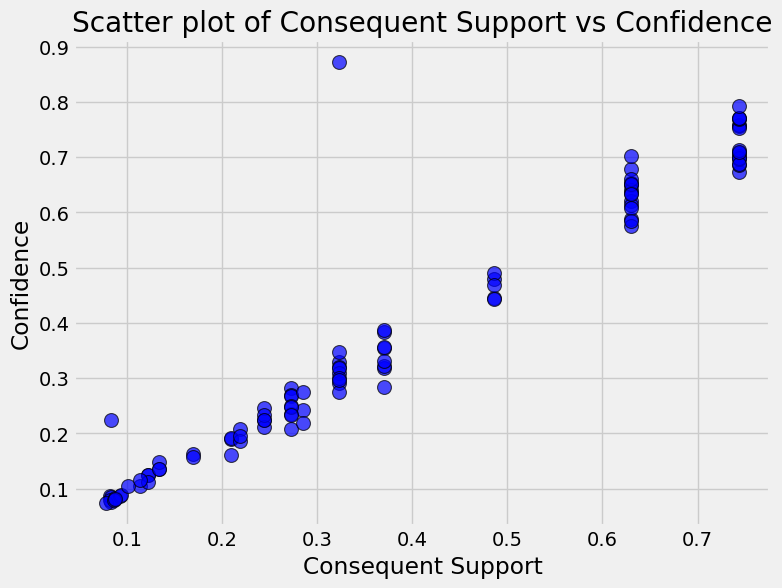

In [59]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='consequent support', y='confidence', data=rules, color='b', edgecolor='k', s=100, alpha=0.7)

# Set the title and labels
plt.title("Scatter plot of Consequent Support vs Confidence")
plt.xlabel("Consequent Support")
plt.ylabel("Confidence")
plt.grid(True)

# Show the plot
plt.show()

As a result of this dichotomy, we often find that among rules of similar confidence levels, the more insightful association rules tend to be of lower consequent support.

In [60]:
# Filter rules with high confidence
high_confidence_rules = rules[rules['confidence'] > 0.5].sort_values('confidence', ascending=False)

# Show the filtered high-quality rules
print(high_confidence_rules.to_markdown())

|    | antecedents                              | consequents                |   antecedent support |   consequent support |   support |   confidence |     lift |     leverage |   conviction |   zhangs_metric |
|---:|:-----------------------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|---------:|-------------:|-------------:|----------------:|
| 17 | frozenset({'jam'})                       | frozenset({'plain bread'}) |            0.0828937 |             0.322909 | 0.0723436 |     0.872727 | 2.7027   |  0.0455765   |     5.32     |      0.686944   |
| 14 | frozenset({'refreshments'})              | frozenset({'angbutter'})   |            0.0817634 |             0.743406 | 0.0648078 |     0.792627 | 1.06621  |  0.00402444  |     1.23735  |      0.0676275  |
| 13 | frozenset({'croissants'})                | frozenset({'angbutter'})   |            0.630369  |             0.743406 | 0.486059  |     0.77107  | 1.03

Filtering by high confidence alone generates a selection of good and bad rules. As such, it's better to filter by an additional metric on a bare minimum criteria. We could filter by lift or conviction levels greater than 1, or by leverage levels or Zhang's metrics greater than 0. In this specific case, all of these will generate the same result set. We'll filter by lift values here.

In [61]:
# Filter rules with high confidence
high_confidence_rules_filtered = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.0)].sort_values('confidence', ascending=False)

# Show the filtered high-quality rules
print(high_confidence_rules_filtered.to_markdown())

|    | antecedents                             | consequents                |   antecedent support |   consequent support |   support |   confidence |    lift |    leverage |   conviction |   zhangs_metric |
|---:|:----------------------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|------------:|-------------:|----------------:|
| 17 | frozenset({'jam'})                      | frozenset({'plain bread'}) |            0.0828937 |             0.322909 | 0.0723436 |     0.872727 | 2.7027  | 0.0455765   |      5.32    |      0.686944   |
| 14 | frozenset({'refreshments'})             | frozenset({'angbutter'})   |            0.0817634 |             0.743406 | 0.0648078 |     0.792627 | 1.06621 | 0.00402444  |      1.23735 |      0.0676275  |
| 13 | frozenset({'croissants'})               | frozenset({'angbutter'})   |            0.630369  |             0.743406 | 0.486059  |     0.77107  | 1.03721 | 0.01743

Findings:
- We see that angbutter and croissants appear as consequents among many instances of high confidence basket combinations. This may not all be due to any inherent correlation between these two categories with other items, but simply due to these items being the most abundantly observed item groups within all transactions.
- We see that a lot of customers tend to purchase around 2 food items from some of the more common food categories, including both angbutter pastries and croissants.
- Of the people who buy any drink items, it also tends to be fairly common to purchase an angbutter item to accomany it; this pattern does not seem to be as common with other food item combinations.
- The only really strong rule that stands out in this group is "jam -> plainbread", which has high measures in all other metrics.
  - From a confidence standpoint, it makes a lot of sense that if someone purchases a packet of jam, they are almost certain to purchase some accompanying (likely bread-like) food to eat it with.
- I'd also like to foreshadow future findings, and highlight the item combination of wieners with croissants.
  - There are two variants of this combination within this result set, but we will see the base "wiener -> croissant" rule again going forth.
  - This rule sees relatively high figures in both lift and conviction, and marginally high figures in all other non-support metrics.

#### Highest Lift

Lift is a good metric to rate the association of items in a rule regardless of which direction the rule is oriented. This means that the rules "X -> Y" and "Y -> X" will have the same lift metric, and antecedent/consequent assignments are not as important. It's the grouping of two items as a whole being considered.

In [62]:
# Filter rules with high lift
high_lift_rules = rules[rules['lift'] > 1.03].sort_values('lift', ascending=False)

# Show the filtered high-quality rules
print(high_lift_rules.to_markdown())

|    | antecedents                        | consequents                        |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:-----------------------------------|:-----------------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 16 | frozenset({'plain bread'})         | frozenset({'jam'})                 |            0.322909  |            0.0828937 | 0.0723436 |    0.224037  | 2.7027  | 0.0455765  |      1.18189 |       0.930451  |
| 17 | frozenset({'jam'})                 | frozenset({'plain bread'})         |            0.0828937 |            0.322909  | 0.0723436 |    0.872727  | 2.7027  | 0.0455765  |      5.32    |       0.686944  |
| 28 | frozenset({'wiener'})              | frozenset({'croissants'})          |            0.13376   |            0.630369  | 0.0938206 |    0.701408  | 1.1126

Findings:
- We see two item pairings previously pointed out that have significantly high lift metrics above 1.1:
  - "plain bread + jam"
  - "croissants + weiner".
- We also see many additional rules featured after the previous confidence filters, as well as their reciprocals:
  - "plain bread + croissants"
  - "refreshments + angbutter"
  - "cakes + croissants"
  - "croissants + angbutter"
  - "cakes + angbutter"
  - "coffees + angbutter"
  - "wiener + angbutter + croissants"
  - "jam + croissants"

#### Highest Leverage

Leverage is similar to lift in that the item-pair reciprocals are given the same metric regardless of direction. However, like confidence, leverage is still somewhat weighed by a support metric. In this case, it is loosely positively correlated with the overall support metric of the itemset:

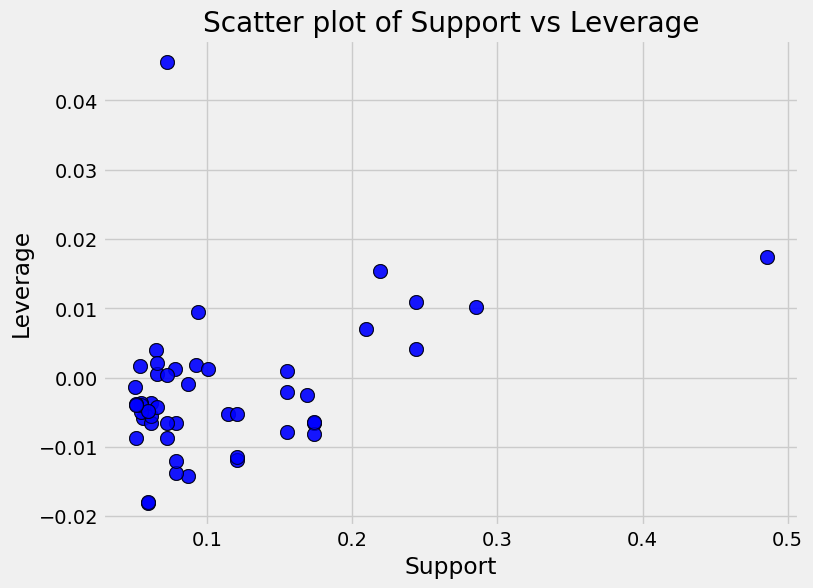

In [63]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='support', y='leverage', data=rules, color='b', edgecolor='k', s=100, alpha=0.7)

# Set the title and labels
plt.title("Scatter plot of Support vs Leverage")
plt.xlabel("Support")
plt.ylabel("Leverage")
plt.grid(True)

# Show the plot
plt.show()

In [64]:
# Filter rules with high leverage
high_leverage_rules = rules[rules['leverage'] > 0.01].sort_values('leverage', ascending=False)

# Show the filtered high-quality rules
print(high_leverage_rules.to_markdown())

|    | antecedents                | consequents                |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:---------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 16 | frozenset({'plain bread'}) | frozenset({'jam'})         |            0.322909  |            0.0828937 | 0.0723436 |     0.224037 | 2.7027  |  0.0455765 |      1.18189 |       0.930451  |
| 17 | frozenset({'jam'})         | frozenset({'plain bread'}) |            0.0828937 |            0.322909  | 0.0723436 |     0.872727 | 2.7027  |  0.0455765 |      5.32    |       0.686944  |
| 12 | frozenset({'angbutter'})   | frozenset({'croissants'})  |            0.743406  |            0.630369  | 0.486059  |     0.653827 | 1.03721 |  0.0174384 |      1.06776 |       0.139821  |
| 13 | frozenset({'croissants'

In my opinion, this metric is more skewed towards high-support item combinations than the lift metric.

#### Highest Conviction

In [65]:
# Filter rules with high conviction
high_conviction_rules = rules[rules['conviction'] > 1.1].sort_values('conviction', ascending=False)

# Show the filtered high-quality rules
print(high_conviction_rules.to_markdown())

|    | antecedents                 | consequents                |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:----------------------------|:---------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 17 | frozenset({'jam'})          | frozenset({'plain bread'}) |            0.0828937 |            0.322909  | 0.0723436 |     0.872727 | 2.7027  | 0.0455765  |      5.32    |       0.686944  |
| 28 | frozenset({'wiener'})       | frozenset({'croissants'})  |            0.13376   |            0.630369  | 0.0938206 |     0.701408 | 1.11269 | 0.00950223 |      1.23791 |       0.11692   |
| 14 | frozenset({'refreshments'}) | frozenset({'angbutter'})   |            0.0817634 |            0.743406  | 0.0648078 |     0.792627 | 1.06621 | 0.00402444 |      1.23735 |       0.0676275 |
| 16 | frozenset({'plain 

Findings:
- Both "jam + plain bread" rules carry high conviction levels, but the "jam -> plain bread" rule has a far higher conviction than any other rule. It does seem like this is a fairly certain rule to expect.
- The "wiener -> croissants" rule has a high conviction level, but its reciprocal is far lower at around 1.01 (and is not featured in this result accordingly).
- The same pattern exists for the rules "refreshments -> angbutter" and "coffees -> angbutter" rules, where there reciprocal conviction levels are far lower.
- The reciprocals of the "plain bread -> croissants", "croissants -> angbutter", and "cakes -> angbutter" are lower than the included conviction levels here, but not as low as that of the two prior rules. This probably indicates that there is some *slight* conviction advantage to high-support item pairings.

#### Highest Zhang Metrics

The above Zhang's metric plot seems to mostly adhere to a normal distribution, with two notable outliers at around 0.7 and 0.9. Since Zhang's metric can only sit between values of -1 and 1, a 0.9 and 0.7 metric would both be very significant. We'll filter by Zhang's metric figures over 0.1 so that we can see the outliers in addition to rules on the upper tail of the Zhang's metric bell curve.

In [66]:
# Filter rules with high zhangs_metric
high_zm_rules = rules[rules['zhangs_metric'] > 0.1].sort_values('zhangs_metric', ascending=False)

# Show the filtered high-quality rules
print(high_zm_rules.to_markdown())

|    | antecedents                | consequents                 |   antecedent support |   consequent support |   support |   confidence |    lift |   leverage |   conviction |   zhangs_metric |
|---:|:---------------------------|:----------------------------|---------------------:|---------------------:|----------:|-------------:|--------:|-----------:|-------------:|----------------:|
| 16 | frozenset({'plain bread'}) | frozenset({'jam'})          |            0.322909  |            0.0828937 | 0.0723436 |    0.224037  | 2.7027  | 0.0455765  |      1.18189 |        0.930451 |
| 17 | frozenset({'jam'})         | frozenset({'plain bread'})  |            0.0828937 |            0.322909  | 0.0723436 |    0.872727  | 2.7027  | 0.0455765  |      5.32    |        0.686944 |
| 29 | frozenset({'croissants'})  | frozenset({'wiener'})       |            0.630369  |            0.13376   | 0.0938206 |    0.148834  | 1.11269 | 0.00950223 |      1.01771 |        0.274005 |
| 15 | frozenset({'angbut

Findings:
- The Zhang's metric seems to give extra focus to the recriprocals of rules that typically have lower figures in all other metrics than their counterparts.
  - This enables us to take a closer look at the other side of some of the more interesting rules observed in prior metrics, that were otherwised excluded due to lower support and confidence values.
- We can see that both our Zhang's metric outliers are rule variants of the "jam + plain bread" item pair.
  - It's likely safe to say at this point that these two items are highly associated within the bakery.
- Both "wiener + croissants" rules have high Zhang metrics, with the "croissants -> wiener" rule sitting at a pretty high 0.27.
- The "angbutter -> refreshments" rule sits just below this at 0.24, which is still pretty high for this set of rules.

#### Low Zhang Metrics

In [67]:
# Filter rules with low zhangs_metric
low_zm_rules = rules[rules['zhangs_metric'] < -0.1].sort_values('zhangs_metric')

# Show the filtered rules
print(low_zm_rules.to_markdown())

|    | antecedents                              | consequents                              |   antecedent support |   consequent support |   support |   confidence |     lift |    leverage |   conviction |   zhangs_metric |
|---:|:-----------------------------------------|:-----------------------------------------|---------------------:|---------------------:|----------:|-------------:|---------:|------------:|-------------:|----------------:|
| 73 | frozenset({'cakes'})                     | frozenset({'coffees', 'angbutter'})      |            0.370008  |            0.209495  | 0.0595328 |    0.160896  | 0.768019 | -0.017982   |     0.942082 |       -0.324075 |
| 70 | frozenset({'cakes', 'angbutter'})        | frozenset({'coffees'})                   |            0.28523   |            0.272419  | 0.0595328 |    0.208719  | 0.766168 | -0.0181692  |     0.919497 |       -0.299223 |
| 71 | frozenset({'coffees'})                   | frozenset({'cakes', 'angbutter'})        |            